<a href="https://colab.research.google.com/github/ArpanSM/Machine_Learning_Hackathons/blob/master/Amazon_Business_Research_Analyst_Hiring_Challenge_Round_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The First Step....

Let's download the data, read and analyze it.

In [ ]:
!wget https://he-s3.s3.ap-southeast-1.amazonaws.com/media/hackathon/amazon-ml-engineer-hiring-challenge-may21-round-1/gender-neutrality-and-inclusion-3-dc209ddb/0753aae4bec411eb.zip
!unzip /content/0753aae4bec411eb.zip
!pip install explainerdashboard
!pip install plotly_express
!pip install shap

In [ ]:
#import modules
import numpy as np
import pandas as pd

import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline


import shap
import eli5
shap.initjs()

import warnings                                 
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Train.csv")
dft = pd.read_csv("/content/Test.csv")
sub = pd.read_csv("/content/sample submission.csv")
pd.set_option('display.max_columns', 500)

##Data Analysis

In [ ]:
df['BiasInfluentialFactor'].unique()

array(['YearsOfExperince', 'Gender', 'DegreeBranch', 'CurrentCompanyType',
       'MartialStatus', 'HighestDegree', 'EmpScore', 'Ethinicity',
       'LatestDegreeCGPA'], dtype=object)

In [ ]:
df.head()

EmpID  EmpName LanguageOfCommunication  Age  Gender  \
0  11041     John                 English   35    Male   
1  15079  William                 English   26    Male   
2  18638    James                 English   36  Female   
3   3941  Charles                 English   29  Female   
4   5936   George                 English   25    Male   

  JobProfileIDApplyingFor HighestDegree             DegreeBranch  \
0                 JR85289        B.Tech               Electrical   
1                 JR87525        B.Tech  Artificial Intelligence   
2                 JR87525           PhD         Computer Science   
3                 JR87525           BCA   Information Technology   
4                 JR70175   Dual M.Tech         Computer Science   

  GraduatingInstitute  LatestDegreeCGPA  YearsOfExperince  GraduationYear  \
0              Tier 1                 7                12            2009   
1              Tier 3                 7                 3            2018   
2              Tier 1                 6                 6            2015   
3              Tier 2                 5                 6            2015   
4              Tier 3                 8                 2            2019   

   CurrentCTC  ExpectedCTC MartialStatus  EmpScore CurrentDesignation  \
0          21           26       Married         5                SSE   
1          15           19       Married         5                 BA   
2          15           24        Single         5                SDE   
3          16           24       Married         5                SDE   
4          24           32       Married         5                SDE   

  CurrentCompanyType DepartmentInCompany  TotalLeavesTaken  \
0         Enterprise              Design                20   
1           MidSized         Engineering                 6   
2           MidSized         Engineering                19   
3            Startup             Product                16   
4         Enterprise         Engineering                10   

  BiasInfluentialFactor  FitmentPercent  
0      YearsOfExperince           95.40  
1                   NaN           67.09  
2                Gender           91.26  
3                Gender           72.29  
4          DegreeBranch           86.34

**Inference**


1.   We have unique Employ-ID and Employ-Name
2.   We have Employee's personal information such as age, gender, language spoken, martial status for data.
3.   We also educational data such as highest degree achieved, branch of study, cgpa, graduating year and college tier data.
4.   We also have professional carrier data such as current and expected ctc, employement score and past work related data.
5.   According to the problem statement we have to 3 sets of problem to solve here
 
      1.   Classification of `BiasInfluentialFactor` (Category of data which is influening the Fitment Percenatage)for each employee
      2.   Regression of `FitmentPercent` (How likely he/she is to be hired based on data provided) for each employee after removing the Bias
      3.    Business Analysis of these predictions for bias free hiring.

6. **We do have some null values in `BiasInfluentialFactor`. What does this mean? Was the hiring in this case bias free or were the employers could not assign any sort of bias to the employee?**





Since, we can't decide what to do with missing values, our best choice here would be to drop them

In [ ]:
df.dropna(inplace =True)

**Outliers**

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Unfortunately, all analysts will confront outliers and be forced to make decisions about what to do with them. Given the problems they can cause, you might think that it’s best to remove them from your data. But, that’s not always the case. Removing outliers is legitimate only for specific reasons.Outliers can be very informative about the subject-area and data collection process. It’s essential to understand how outliers occur and whether they might happen again as a normal part of the process or study area. Unfortunately, resisting the temptation to remove outliers inappropriately can be difficult. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. In our case, let's first visualize our data and decide on what to do with the outliers

Text(0.5, 1.0, 'Expected - CTC')

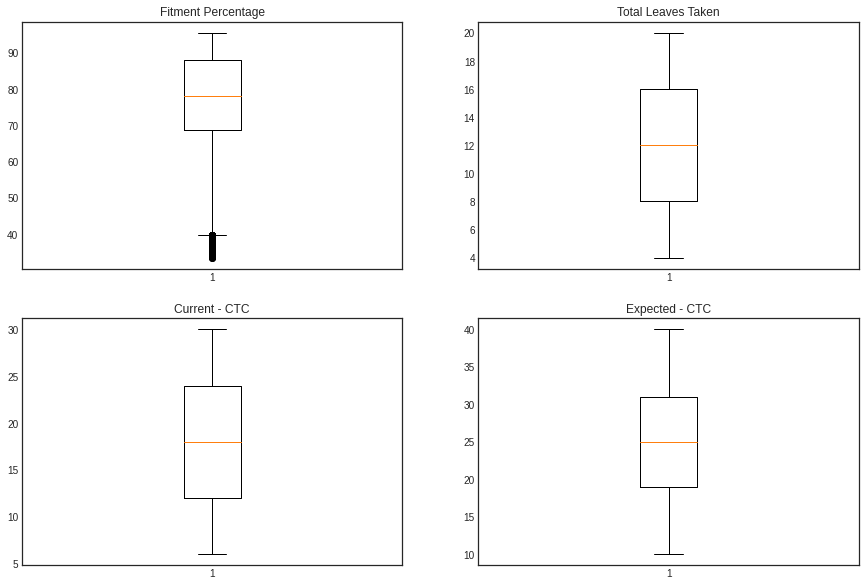

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['FitmentPercent'])
ax.set_title('Fitment Percentage')
ax=plt.subplot(222)
plt.boxplot(df['TotalLeavesTaken'])
ax.set_title('Total Leaves Taken')
ax=plt.subplot(223)
plt.boxplot(df['CurrentCTC'])
ax.set_title('Current - CTC')
ax=plt.subplot(224)
plt.boxplot(df['ExpectedCTC'])
ax.set_title('Expected - CTC')

As you see, we have very less number of outliers in our features. Especially we have majority of the outliers in fitment percentage. Since the outlier present are in large numbers it won't be wise to remove them.


**Count of categorical features - Count plot**

[Text(0, 0, 'Married'), Text(0, 0, 'Single')]

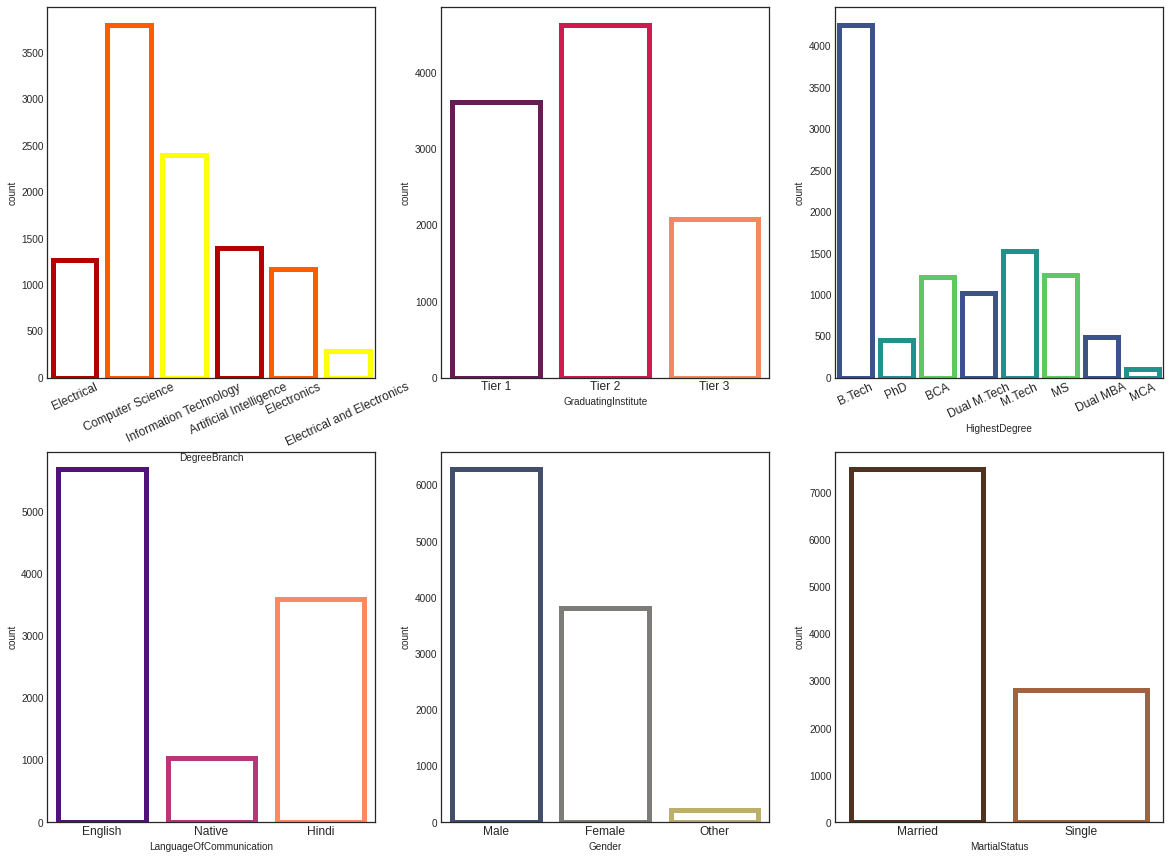

In [ ]:
plt.figure(figsize = (30, 20))
plt.style.use('seaborn-white')

#LanguageOfCommunication
plt.subplot(234)
ax=sns.countplot(x="LanguageOfCommunication", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(20,15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Gender
plt.subplot(235)
ax=sns.countplot(x="Gender", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("cividis", 3))
fig = plt.gcf()
fig.set_size_inches(20,15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#HighestDegree
plt.subplot(233)
ax=sns.countplot(x="HighestDegree", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("viridis", 3))
fig = plt.gcf()
fig.set_size_inches(20,15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=25)

#DegreeBranch
plt.subplot(231)
ax=sns.countplot(x="DegreeBranch", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(20,15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12, rotation=25)

#GraduatingInstitute
plt.subplot(232)
ax=sns.countplot(x="GraduatingInstitute", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(20,15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#MartialStatus
plt.subplot(236)
ax=sns.countplot(x="MartialStatus", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("copper", 3))
fig = plt.gcf()
fig.set_size_inches(20,15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

**Inference**

1.   We have more candidates from CS and IT department.
2.   We have more candidates from Tier 2 college.
3.   We have more candidates with B Tech degree.
4.   English speaking candidated are more in numbers.
5.   More Male candidates than female candidates.
6.   More married candidates than single candidates.



[Text(0, 0, 'YearsOfExperince'),
 Text(0, 0, 'Gender'),
 Text(0, 0, 'DegreeBranch'),
 Text(0, 0, 'CurrentCompanyType'),
 Text(0, 0, 'MartialStatus'),
 Text(0, 0, 'HighestDegree'),
 Text(0, 0, 'EmpScore'),
 Text(0, 0, 'Ethinicity'),
 Text(0, 0, 'LatestDegreeCGPA')]

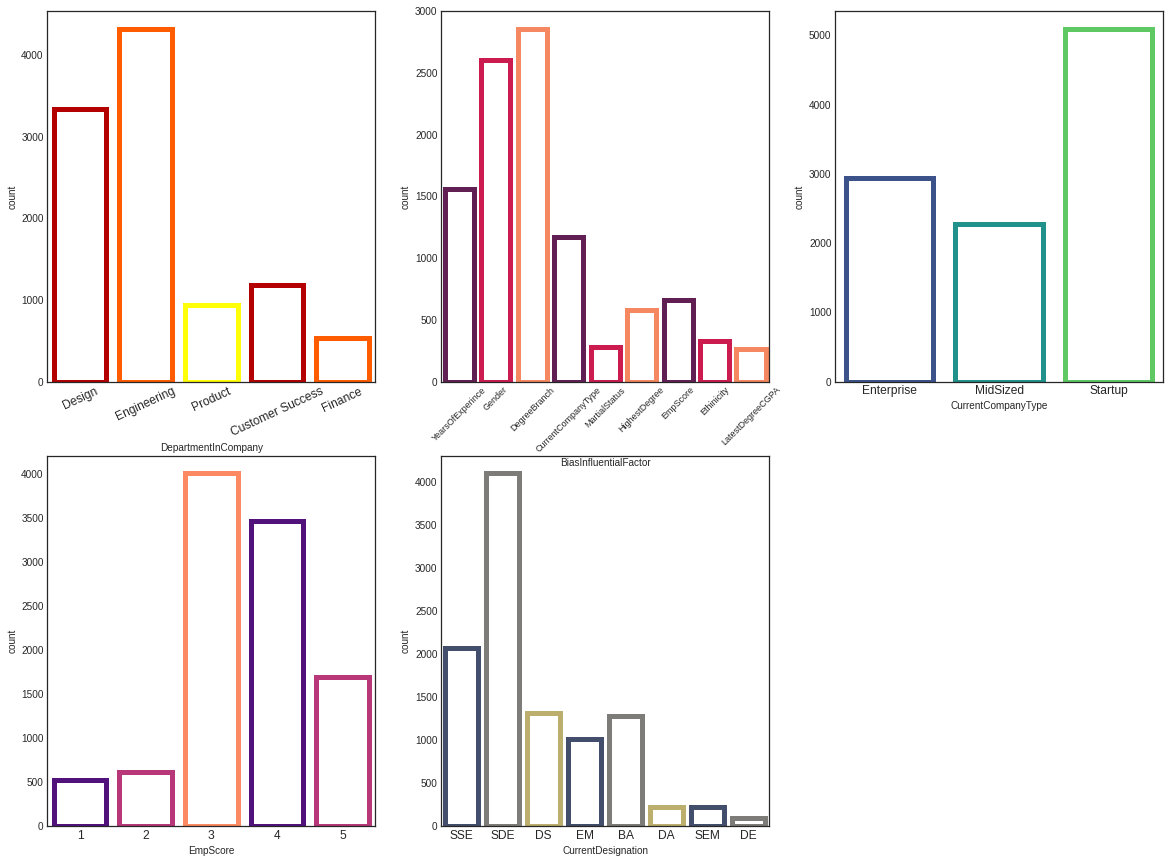

In [ ]:
plt.figure(figsize = (30, 20))
plt.style.use('seaborn-white')

#EmpScore
plt.subplot(234)
ax=sns.countplot(x="EmpScore", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(20,15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#CurrentDesignation
plt.subplot(235)
ax=sns.countplot(x="CurrentDesignation", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("cividis", 3))
fig = plt.gcf()
fig.set_size_inches(20,15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#CurrentCompanyType
plt.subplot(233)
ax=sns.countplot(x="CurrentCompanyType", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("viridis", 3))
fig = plt.gcf()
fig.set_size_inches(20,15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#DepartmentInCompany
plt.subplot(231)
ax=sns.countplot(x="DepartmentInCompany", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(20,15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12, rotation=25)

#BiasInfluentialFactor
plt.subplot(232)
ax=sns.countplot(x="BiasInfluentialFactor", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(20,15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=9,rotation=45)

**Inference**

1.   Candidates from Engineering and Design are high
2.   We have more candidates from Startup based company.
3.   Very few candidates hae employibility score less than 3.
4.   More candidates from SSE and SDE domain
5.   **Gender and Degree seems to have the maximum number of bias among all others.**

Distribution Fitment Percentage

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

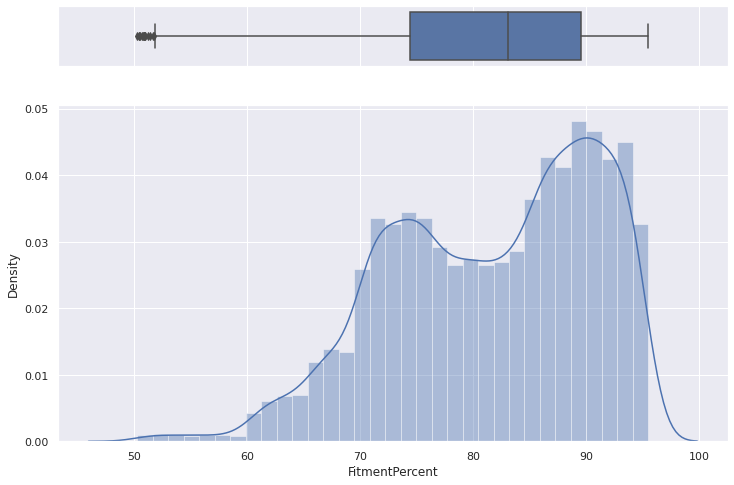

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df["FitmentPercent"], ax=ax_box)
sns.distplot(df["FitmentPercent"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Inference**


1.   Many candidates have Fitment Percent between 70-95%
2.   We would be binning our dataset into 3 separate groups of hiring chances..

      1.   Below 70 - Low
      2.   Between 70 - 80 - Moderate
      3.   Above 80 - High

In [ ]:
df['Chances'] = pd.cut(df['FitmentPercent'], [0, 69, 79, 1000], labels=['Low', 'Moderate', 'High'])

Numeric Columns - Joint Plot Analysis



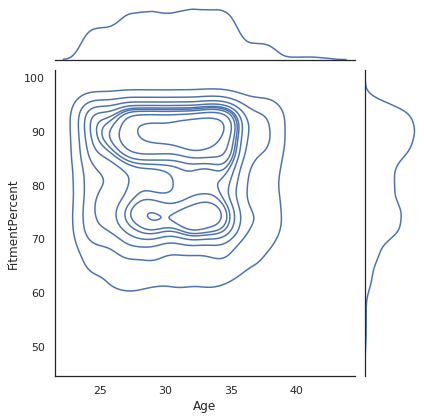

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["Age"], y=df["FitmentPercent"], kind='kde')

**Inference**

As the figure shows, Age - FitmentPercent is evenly distributed. But we can see a slight inclination towards candidates with age 30 - 35 having higher fitment percent.

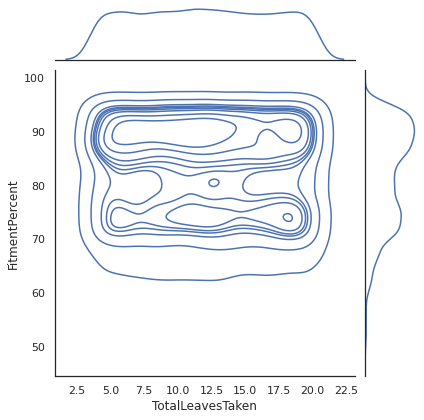

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["TotalLeavesTaken"], y=df["FitmentPercent"], kind='kde')

**Inference**

We can see a slight inclination towards candidates with less leaves taken (5 - 12) having higher chances of hiring.

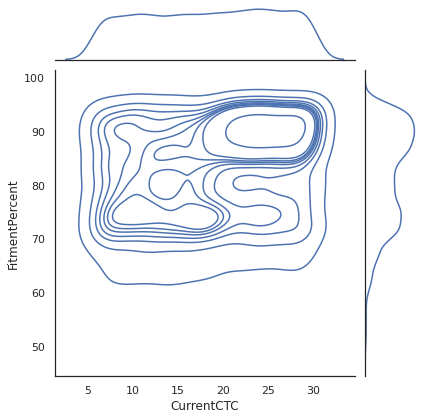

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["CurrentCTC"], y=df["FitmentPercent"], kind='kde')

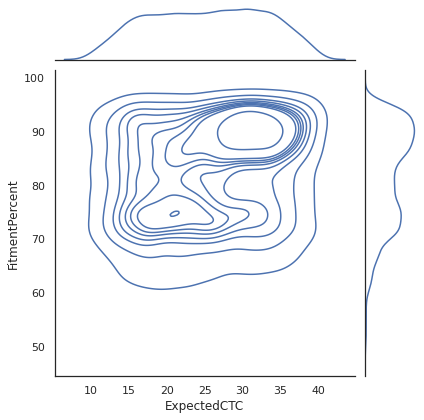

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["ExpectedCTC"], y=df["FitmentPercent"], kind='kde')

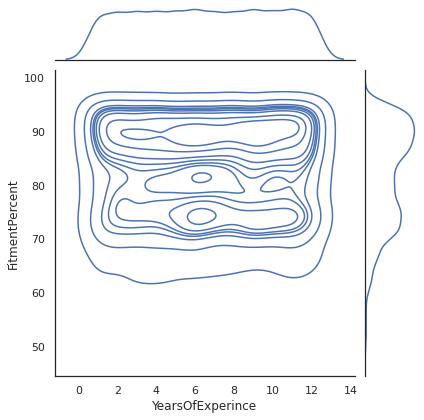

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["YearsOfExperince"], y=df["FitmentPercent"], kind='kde')

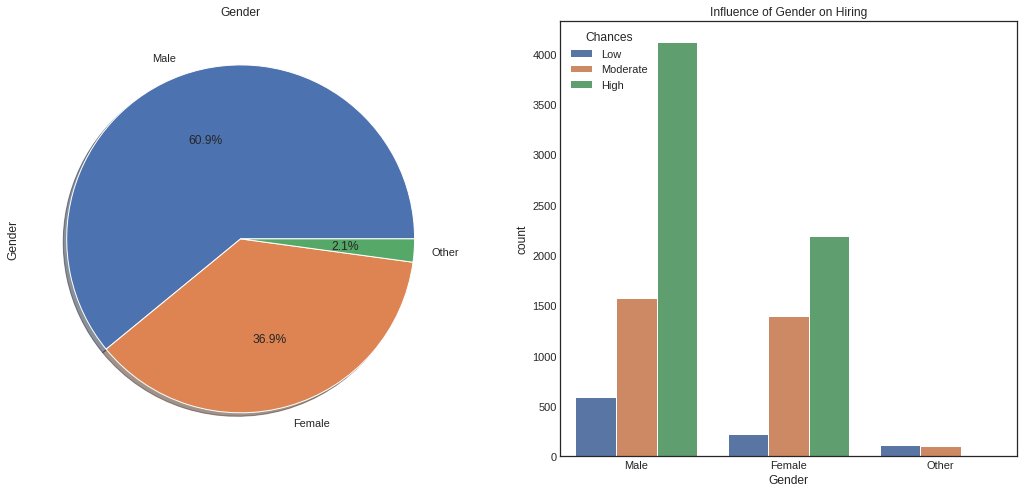

In [ ]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender')
sns.countplot(x = 'Gender',hue = "Chances",data = df)
ax[1].set_title('Influence of Gender on Hiring')
plt.show()

**Inference**

1. We have nearly 60.9% of candidates who are male, which is greater compared to Female and Other combined.
2. More number of male candidates have higher chances of getting the job compared to females anf others.
3. We can conclude that gender doesn't influence a candidate in the recruitment process

In [ ]:
px.violin(df,y="FitmentPercent",x="Chances",color="Gender",box=True,points="all")

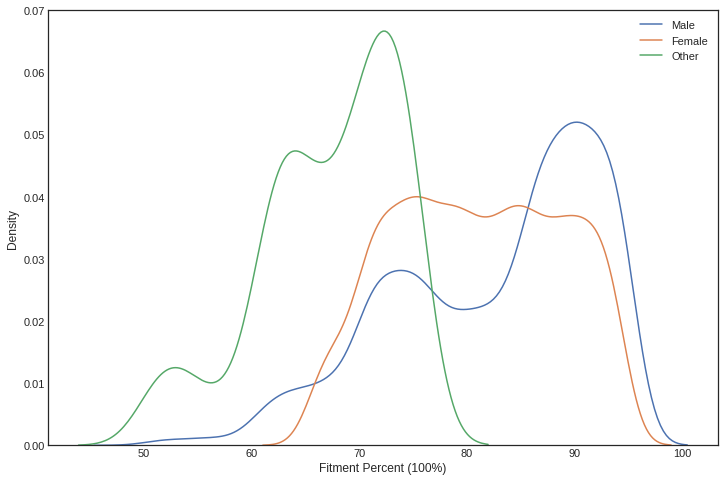

In [ ]:
sns.kdeplot(df.FitmentPercent[ df.Gender=="Male"])
sns.kdeplot(df.FitmentPercent[ df.Gender=="Female"])
sns.kdeplot(df.FitmentPercent[ df.Gender=="Other"])

plt.legend(["Male", "Female", "Other"])
plt.xlabel("Fitment Percent (100%)")
plt.show()

**Inference**



1.   KDE plots describe that male and female have almost similar chances of getting hired. 
2.   Since the total number is skewed due to higher number male students pursuing engineering comapared to female and others, the distribution plot can look skewed.
3.  Looking at the mean, Q1 and Q3, we can say that male and female have almost the same oppurtunity.
4.  Hiring is bias for people with other genders. As we can see, no candidate from other gender has made up to high chances of hiring.
5.  They also have significantly lower chances in Medium and Low category.



In [ ]:
px.violin(df,y="FitmentPercent",x="Chances",color="DegreeBranch",box=True,points="all")

In [ ]:
df['DegreeBranch'].unique()

array(['Electrical', 'Computer Science', 'Information Technology',
       'Artificial Intelligence', 'Electronics',
       'Electrical and Electronics'], dtype=object)

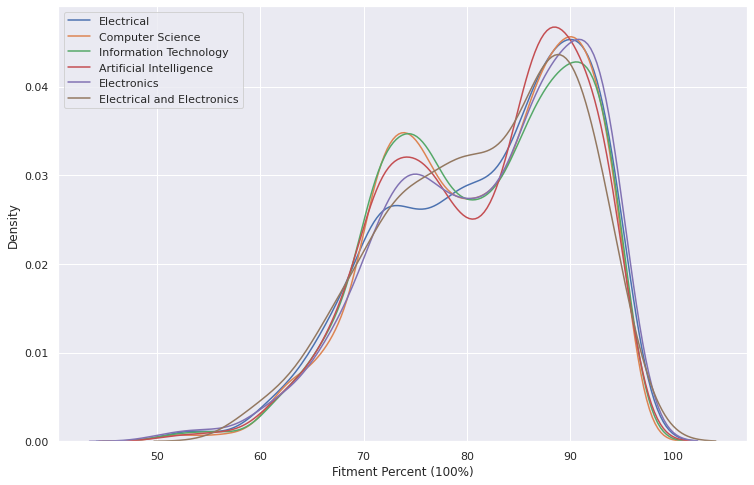

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
sns.kdeplot(df.FitmentPercent[ df.DegreeBranch=="Electrical"])
sns.kdeplot(df.FitmentPercent[ df.DegreeBranch=="Computer Science"])
sns.kdeplot(df.FitmentPercent[ df.DegreeBranch=="Information Technology"])

sns.kdeplot(df.FitmentPercent[ df.DegreeBranch=="Artificial Intelligence"])
sns.kdeplot(df.FitmentPercent[ df.DegreeBranch=="Electronics"])
sns.kdeplot(df.FitmentPercent[ df.DegreeBranch=="Electrical and Electronics"])

plt.legend(['Electrical', 'Computer Science', 'Information Technology',
       'Artificial Intelligence', 'Electronics',
       'Electrical and Electronics'])
plt.xlabel("Fitment Percent (100%)")
plt.show()

In [ ]:
df['LatestDegreeCGPA'].unique()

array([ 7,  6,  5,  8,  9,  4, 10])

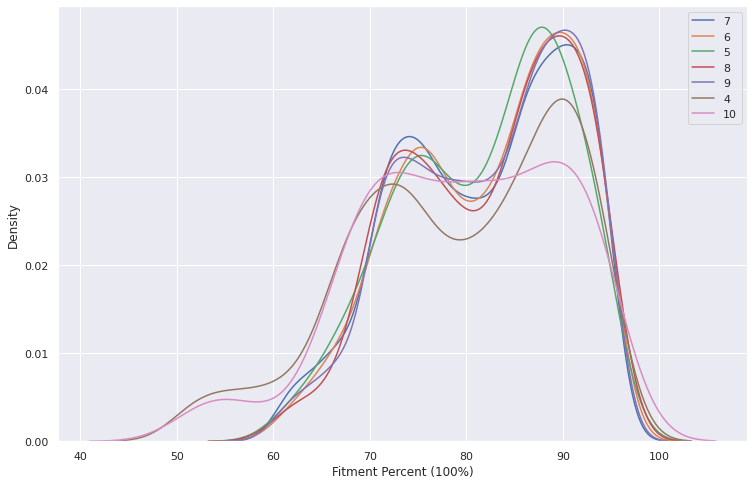

In [ ]:
sns.kdeplot(df.FitmentPercent[ df.LatestDegreeCGPA==7])
sns.kdeplot(df.FitmentPercent[ df.LatestDegreeCGPA==6])
sns.kdeplot(df.FitmentPercent[ df.LatestDegreeCGPA==4])
sns.kdeplot(df.FitmentPercent[ df.LatestDegreeCGPA==5])
sns.kdeplot(df.FitmentPercent[ df.LatestDegreeCGPA==8])
sns.kdeplot(df.FitmentPercent[ df.LatestDegreeCGPA==9])
sns.kdeplot(df.FitmentPercent[ df.LatestDegreeCGPA==10])

plt.legend([7,  6,  5,  8,  9,  4, 10])
plt.xlabel("Fitment Percent (100%)")
plt.show()

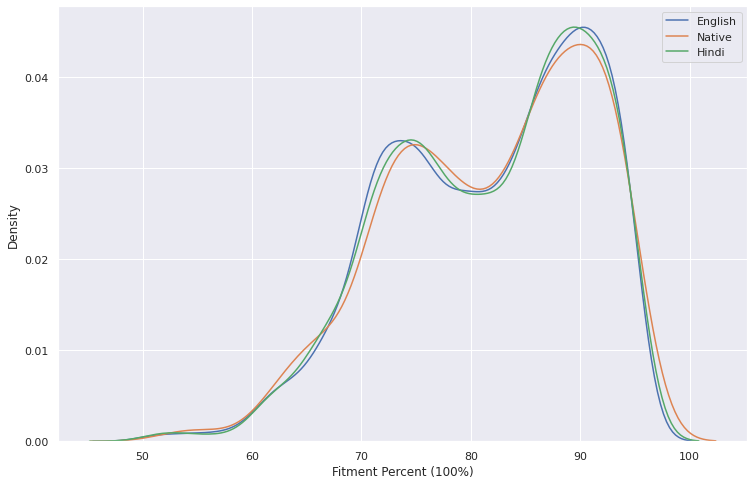

In [ ]:
sns.kdeplot(df.FitmentPercent[ df.LanguageOfCommunication==7])
sns.kdeplot(df.FitmentPercent[ df.LanguageOfCommunication==6])
sns.kdeplot(df.FitmentPercent[ df.LanguageOfCommunication==4])
sns.kdeplot(df.FitmentPercent[ df.LanguageOfCommunication==5])
sns.kdeplot(df.FitmentPercent[ df.LanguageOfCommunication==8])
sns.kdeplot(df.FitmentPercent[ df.LanguageOfCommunication==9])
sns.kdeplot(df.FitmentPercent[ df.LanguageOfCommunication==10])

plt.legend([7,  6,  5,  8,  9,  4, 10])
plt.xlabel("Fitment Percent (100%)")
plt.show()

In [ ]:
px.violin(df,y="FitmentPercent",x="Chances",color="LanguageOfCommunication",box=True,points="all")

In [ ]:
px.violin(df,y="FitmentPercent",x="Chances",color="HighestDegree",box=True,points="all")

In [ ]:
df['HighestDegree'].unique()

array(['B.Tech', 'PhD', 'BCA', 'Dual M.Tech', 'M.Tech', 'MS', 'Dual MBA',
       'MCA'], dtype=object)

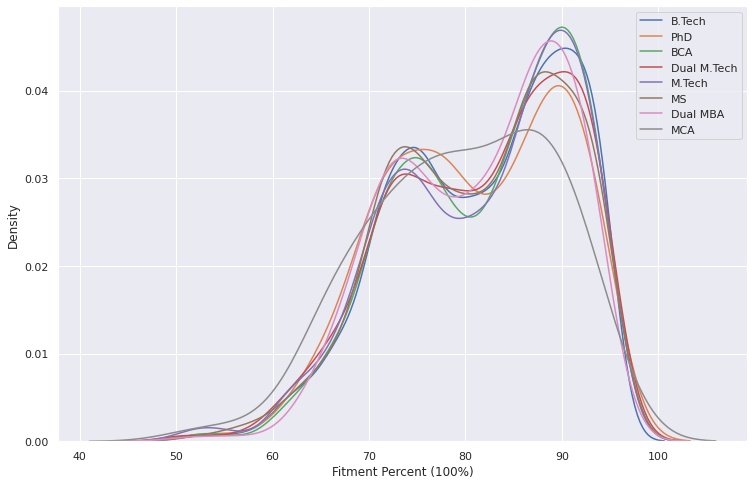

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
sns.kdeplot(df.FitmentPercent[ df.HighestDegree=="B.Tech"])
sns.kdeplot(df.FitmentPercent[ df.HighestDegree=="PhD"])
sns.kdeplot(df.FitmentPercent[ df.HighestDegree=="BCA"])

sns.kdeplot(df.FitmentPercent[ df.HighestDegree=="Dual M.Tech"])
sns.kdeplot(df.FitmentPercent[ df.HighestDegree=="M.Tech"])
sns.kdeplot(df.FitmentPercent[ df.HighestDegree=="MS"])
sns.kdeplot(df.FitmentPercent[ df.HighestDegree=="Dual MBA"])
sns.kdeplot(df.FitmentPercent[ df.HighestDegree=="MCA"])

plt.legend(['B.Tech', 'PhD', 'BCA', 'Dual M.Tech', 'M.Tech', 'MS', 'Dual MBA',
       'MCA'])
plt.xlabel("Fitment Percent (100%)")
plt.show()

In [ ]:
px.violin(df,y="FitmentPercent",x="Chances",color="MartialStatus",box=True,points="all")

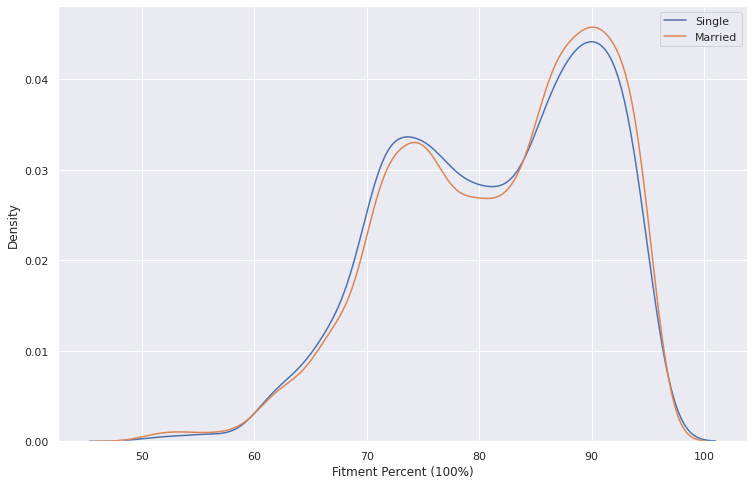

In [ ]:
sns.kdeplot(df.FitmentPercent[ df.MartialStatus=="Single"])
sns.kdeplot(df.FitmentPercent[ df.MartialStatus=="Married"])

plt.legend(["Single", "Married"])
plt.xlabel("Fitment Percent (100%)")
plt.show()

In [ ]:
px.violin(df,y="FitmentPercent",x="Chances",color="YearsOfExperince",box=True,points="all")

In [ ]:
px.violin(df,y="FitmentPercent",x="Chances",color="CurrentCompanyType",box=True,points="all")

In [ ]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender')
sns.countplot(x = 'Gender',hue = "Chances",data = df)
ax[1].set_title('Influence of Gender on Hiring')
plt.show()

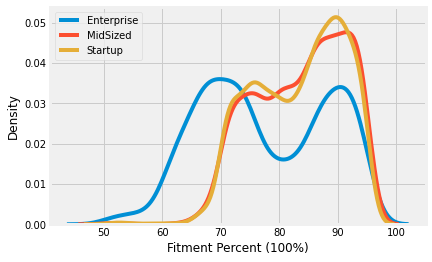

In [ ]:
sns.kdeplot(df.FitmentPercent[ df.CurrentCompanyType=="Enterprise"])
sns.kdeplot(df.FitmentPercent[ df.CurrentCompanyType=="MidSized"])
sns.kdeplot(df.FitmentPercent[ df.CurrentCompanyType=="Startup"])

plt.legend(["Enterprise", "MidSized", "Startup"])
plt.xlabel("Fitment Percent (100%)")
plt.show()

In [ ]:
px.violin(df,y="FitmentPercent",x="Chances",color="EmpScore",box=True,points="all")

In [ ]:
px.violin(df,y="FitmentPercent",x="Chances",color="LatestDegreeCGPA",box=True,points="all")

In [ ]:
df.groupby(['LanguageOfCommunication']).agg({'FitmentPercent': ['mean', 'max', 'min','std','sum']})                                               

FitmentPercent                                   
                                  mean   max    min        std        sum
LanguageOfCommunication                                                  
English                      75.830684  95.5  33.53  14.969447  569488.44
Hindi                        75.998872  95.5  33.53  14.792680  359702.66
Native                       75.743773  95.5  33.60  14.839537  106192.77

In [ ]:
df.groupby(['Gender']).agg({'FitmentPercent': ['mean', 'max', 'min','std','sum']})                                               

FitmentPercent                                    
                 mean    max    min        std        sum
Gender                                                   
Female      79.783742  94.50  65.51   8.313040  345144.47
Male        76.271094  95.50  33.53  15.799354  638846.68
Other       54.499173  75.41  33.58  12.147827   51392.72

In [ ]:
df.groupby(['HighestDegree']).agg({'FitmentPercent': ['mean', 'max', 'min','std','sum']}).sort_values(by=[('FitmentPercent', 'mean')], ascending=False)                                                                      

FitmentPercent                                    
                        mean    max    min        std        sum
HighestDegree                                                   
BCA                76.068764  95.45  33.53  14.898900  124296.36
B.Tech             76.061404  95.50  33.58  14.932019  427389.03
M.Tech             75.944640  95.45  33.58  15.027197  153863.84
Dual M.Tech        75.922253  95.49  33.66  14.586489  103102.42
MS                 75.833920  95.49  33.67  14.628628  119741.76
Dual MBA           75.136541  95.45  34.00  15.234261   49965.80
PhD                74.828333  95.25  33.53  15.172620   46692.88
MCA                73.798429  94.82  36.97  14.321421   10331.78

In [ ]:
df.groupby(['GraduatingInstitute']).agg({'FitmentPercent': ['mean', 'max', 'min','std','sum']})                                              

FitmentPercent                                   
                              mean   max    min        std        sum
GraduatingInstitute                                                  
Tier 1                   75.908757  95.5  33.58  14.733006  363830.67
Tier 2                   76.001105  95.5  33.53  14.999226  462998.73
Tier 3                   75.563214  95.5  33.53  14.940830  208554.47

In [ ]:
df.groupby(['MartialStatus']).agg({'FitmentPercent': ['mean', 'max', 'min','std','sum']})                                              

FitmentPercent                                   
                        mean   max    min        std        sum
MartialStatus                                                  
Married            75.996074  95.5  33.53  14.926972  745521.49
Single             75.583411  95.5  33.62  14.807870  289862.38

In [ ]:
df.groupby(['DegreeBranch']).agg({'FitmentPercent': ['mean', 'max', 'min','std','sum']}).sort_values(by=[('FitmentPercent', 'mean')], ascending=False)                                      

FitmentPercent                                    
                                     mean    max    min        std        sum
DegreeBranch                                                                 
Electrical and Electronics      76.462175  95.44  34.03  13.967079   30584.87
Computer Science                76.104620  95.50  33.53  14.749785  361420.84
Information Technology          75.861590  95.49  33.53  14.930563  227053.74
Electrical                      75.713683  95.50  33.58  15.215899  136511.77
Artificial Intelligence         75.712249  95.50  33.65  14.635951  151500.21
Electronics                     75.522331  95.49  33.62  15.399034  128312.44

In [ ]:
df.groupby(['CurrentDesignation']).agg({'FitmentPercent': ['mean', 'max', 'min','std','sum']}).sort_values(by=[('FitmentPercent', 'mean')], ascending=False)                                      

FitmentPercent                                    
                             mean    max    min        std        sum
CurrentDesignation                                                   
DA                      76.891951  95.50  33.53  15.135000   22067.99
SEM                     76.751882  95.49  33.71  15.023673   22027.79
DS                      76.159615  95.49  33.53  14.961179  130689.90
SSE                     75.885137  95.49  33.62  14.856187  208304.70
SDE                     75.856120  95.50  33.58  14.917150  411367.74
EM                      75.790596  95.50  33.60  14.835361  101710.98
BA                      75.565006  95.50  33.88  14.726174  129216.16
DE                      74.063778  95.09  34.42  15.845899    9998.61

In [ ]:
df.groupby(['CurrentCompanyType']).agg({'FitmentPercent': ['mean', 'max', 'min','std','sum']})                                              

FitmentPercent                                    
                             mean    max    min        std        sum
CurrentCompanyType                                                   
Enterprise              67.096496  95.50  33.53  17.693263  294889.10
MidSized                80.180501  95.49  33.75  11.085276  230679.30
Startup                 79.996151  95.50  33.58  11.187571  509815.47

In [ ]:
df.groupby(['DepartmentInCompany']).agg({'FitmentPercent': ['mean', 'max', 'min','std','sum']}).sort_values(by=[('FitmentPercent', 'mean')], ascending=False)                                                                                

FitmentPercent                                    
                              mean    max    min        std        sum
DepartmentInCompany                                                   
Design                   76.140621  95.50  33.58  15.089422  334485.75
Product                  76.105455  95.49  33.86  14.801171   93761.92
Engineering              75.757453  95.50  33.53  14.733223  435529.60
Finance                  75.710385  95.50  33.60  14.696907   53072.98
Customer Success         75.499121  95.50  33.62  15.093731  118533.62

In [ ]:
df.groupby(['BiasInfluentialFactor']).agg({'FitmentPercent': ['mean', 'max', 'min','std','sum']}).sort_values(by=[('FitmentPercent', 'mean')], ascending=False)                                             

FitmentPercent                                   
                                mean    max    min       std        sum
BiasInfluentialFactor                                                  
Ethinicity                 86.184543  95.46  75.14  6.033410   28268.53
EmpScore                   85.915099  95.49  70.05  7.252404   56618.05
MartialStatus              84.982286  95.47  75.01  5.704635   23795.04
HighestDegree              84.338866  95.49  70.00  7.565369   49085.22
DegreeBranch               83.990420  95.50  70.00  7.756605  240044.62
YearsOfExperince           83.456489  95.50  70.00  7.525913  130275.58
Gender                     82.058779  94.50  70.00  7.059968  213763.12
CurrentCompanyType         71.095784  95.50  60.00  9.660391   83466.45
LatestDegreeCGPA           64.879656  94.50  50.32  9.254341   16998.47

##Feature Engineering

In [ ]:
#Label encoding of categorical data based on the data analysis
#Binning of Numerical or continuos data
#this process is done for both train and test set

from sklearn.preprocessing import KBinsDiscretizer
def fe_1(train,test):
  train = pd.read_csv("/content/Train.csv")
  test = pd.read_csv("/content/Test.csv")

  del train['EmpName']
  del test['EmpName']

  #label encoding
  train['LanguageOfCommunication'] = train['LanguageOfCommunication'].map({'Hindi': 2, 'English': 1,'Native':0})
  test['LanguageOfCommunication'] = test['LanguageOfCommunication'].map({'Hindi': 2, 'English': 1,'Native':0})

  train['Gender'] = train['Gender'].map({'Female': 2, 'Male': 1,'Other':0})
  test['Gender'] = test['Gender'].map({'Female': 2, 'Male': 1,'Other':0})

  train['HighestDegree'] = train['HighestDegree'].map({'BCA':7, 'B.Tech':6, 'M.Tech':5,'Dual M.Tech':4,'MS':3, 'Dual MBA':2, 'PhD':1, 'MCA':0})
  test['HighestDegree'] = test['HighestDegree'].map({'BCA':7, 'B.Tech':6, 'M.Tech':5,'Dual M.Tech':4,'MS':3, 'Dual MBA':2, 'PhD':1,'MCA':0})
  
  train['GraduatingInstitute'] = train['GraduatingInstitute'].map({'Tier 2': 2, 'Tier 1': 1,'Tier 3':0})
  test['GraduatingInstitute'] = test['GraduatingInstitute'].map({'Tier 2': 2, 'Tier 1': 1,'Tier 3':0})

  train['MartialStatus'] = train['MartialStatus'].map({'Married': 1,'Single':0})
  test['MartialStatus'] = test['MartialStatus'].map({'Married': 1,'Single':0})

  train['CurrentDesignation'] = train['CurrentDesignation'].map({'DA':7, 'SEM':6, 'DS':5,'SSE':4,'SDE':3, 'EM':2, 'BA':1,'DE':0})
  test['CurrentDesignation'] = test['CurrentDesignation'].map({'DA':7, 'SEM':6, 'DS':5,'SSE':4,'SDE':3, 'EM':2, 'BA':1,'DE':0})

  train['DegreeBranch'] = train['DegreeBranch'].map({'Electrical and Electronics':5,'Computer Science':4,'Information Technology':3, 'Electrical':2, 'Artificial Intelligence':1,'Electronics':0})
  test['DegreeBranch'] = test['DegreeBranch'].map({'Electrical and Electronics':5,'Computer Science':4,'Information Technology':3, 'Electrical':2, 'Artificial Intelligence':1,'Electronics':0})

  train['CurrentCompanyType'] = train['CurrentCompanyType'].map({'MidSized': 2, 'Startup': 1,'Enterprise':0})
  test['CurrentCompanyType'] = test['CurrentCompanyType'].map({'MidSized': 2, 'Startup': 1,'Enterprise':0})

  train['DepartmentInCompany'] = train['DepartmentInCompany'].map({'Design':4,'Product':3, 'Engineering':2, 'Finance':1,'Customer Success':0})
  test['DepartmentInCompany'] = test['DepartmentInCompany'].map({'Design':4,'Product':3, 'Engineering':2, 'Finance':1,'Customer Success':0})

  #binning
  Age_Bins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
  train['Age_Bins'] =Age_Bins.fit_transform(train['Age'].values.reshape(-1,1)).astype(int)
  test['Age_Bins'] =Age_Bins.fit_transform(test['Age'].values.reshape(-1,1)).astype(int)

  TotalLeavesTaken_Bins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
  train['TotalLeavesTaken_Bins'] =TotalLeavesTaken_Bins.fit_transform(train['TotalLeavesTaken'].values.reshape(-1,1)).astype(int)
  test['TotalLeavesTaken_Bins'] =TotalLeavesTaken_Bins.fit_transform(test['TotalLeavesTaken'].values.reshape(-1,1)).astype(int)

  CurrentCTC_Bins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
  train['CurrentCTC_Bins'] =CurrentCTC_Bins.fit_transform(train['CurrentCTC'].values.reshape(-1,1)).astype(int)
  test['CurrentCTC_Bins'] =CurrentCTC_Bins.fit_transform(test['CurrentCTC'].values.reshape(-1,1)).astype(int)

  ExpectedCTC_Bins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
  train['ExpectedCTC_Bins'] =ExpectedCTC_Bins.fit_transform(train['ExpectedCTC'].values.reshape(-1,1)).astype(int)
  test['ExpectedCTC_Bins'] =ExpectedCTC_Bins.fit_transform(test['ExpectedCTC'].values.reshape(-1,1)).astype(int)

  train.dropna(inplace =True)
  
  print("Train Shape - ", train.shape)
  print("Test Shape - ", test.shape)

  return train, test

train, test = fe_1(df, dft)

Train Shape -  (10309, 25)
Test Shape -  (8745, 23)


In [ ]:
#combine train and test into a single dataframe -  df
def combine(train,test):
  #combine train & test
  train['train_or_test']='train'
  test['train_or_test']='test'
  df = pd.concat([train,test])
  print("Train Shape - ", train.shape)
  print("Test Shape - ", test.shape)
  print("Total DF Shape - ", df.shape)
  return df

df = combine(train,test)

Train Shape -  (10309, 26)
Test Shape -  (8745, 24)
Total DF Shape -  (19054, 26)


In [ ]:
#categorical data frequency encoding
def frequency_encoding(column_name,output_column_name,df):
    fe_pol = (df.groupby(column_name).size()) / len(df)
    df[output_column_name] = df[column_name].apply(lambda x : fe_pol[x])

def frequency_encoding_fe(df):
  frequency_encoding('LanguageOfCommunication','LanguageOfCommunication_fe',df)
  frequency_encoding('Gender','Gender_fe',df)
  frequency_encoding('JobProfileIDApplyingFor','JobProfileIDApplyingFor_fe',df)
  frequency_encoding('HighestDegree','HighestDegree_fe',df)
  frequency_encoding('DegreeBranch','DegreeBranch_fe',df)
  frequency_encoding('GraduatingInstitute','GraduatingInstitute_fe',df)
  frequency_encoding('LatestDegreeCGPA','LatestDegreeCGPA_fe',df)
  frequency_encoding('YearsOfExperince','YearsOfExperince_fe',df)
  frequency_encoding('GraduationYear','GraduationYear_fe',df)
  frequency_encoding('MartialStatus','MartialStatus_fe',df)
  frequency_encoding('EmpScore','EmpScore_fe',df)
  frequency_encoding('CurrentDesignation','CurrentDesignation_fe',df)
  frequency_encoding('CurrentCompanyType','CurrentCompanyType_fe',df)
  frequency_encoding('DepartmentInCompany','DepartmentInCompany_fe',df)
  print("Total DF Shape - ", df.shape)
  return df

df = frequency_encoding_fe(df)

Total DF Shape -  (19054, 40)


In [ ]:
#view the feature engineered data
df.head()

EmpID  LanguageOfCommunication  Age  Gender JobProfileIDApplyingFor  \
0  11041                        1   35       1                 JR85289   
2  18638                        1   36       2                 JR87525   
3   3941                        1   29       2                 JR87525   
4   5936                        1   25       1                 JR70175   
5   9670                        0   35       1                 JR88879   

   HighestDegree  DegreeBranch  GraduatingInstitute  LatestDegreeCGPA  \
0              6             2                    1                 7   
2              1             4                    1                 6   
3              7             3                    2                 5   
4              4             4                    0                 8   
5              7             4                    2                 9   

   YearsOfExperince  GraduationYear  CurrentCTC  ExpectedCTC  MartialStatus  \
0                12            2009          21           26              1   
2                 6            2015          15           24              0   
3                 6            2015          16           24              1   
4                 2            2019          24           32              1   
5                12            2009          25           29              1   

   EmpScore  CurrentDesignation  CurrentCompanyType  DepartmentInCompany  \
0         5                   4                   0                    4   
2         5                   3                   2                    2   
3         5                   3                   1                    3   
4         5                   3                   0                    2   
5         4                   5                   2                    2   

   TotalLeavesTaken BiasInfluentialFactor  FitmentPercent  Age_Bins  \
0                20      YearsOfExperince           95.40         3   
2                19                Gender           91.26         3   
3                16                Gender           72.29         1   
4                10          DegreeBranch           86.34         0   
5                10      YearsOfExperince           93.23         3   

   TotalLeavesTaken_Bins  CurrentCTC_Bins  ExpectedCTC_Bins train_or_test  \
0                      3                2                 2         train   
2                      3                1                 1         train   
3                      3                1                 1         train   
4                      1                3                 3         train   
5                      1                3                 2         train   

   LanguageOfCommunication_fe  Gender_fe  JobProfileIDApplyingFor_fe  \
0                    0.548389   0.613362                    0.344967   
2                    0.548389   0.341293                    0.249396   
3                    0.548389   0.341293                    0.249396   
4                    0.548389   0.613362                    0.018841   
5                    0.100924   0.613362                    0.090690   

   HighestDegree_fe  DegreeBranch_fe  GraduatingInstitute_fe  \
0          0.407054         0.125590                0.346646   
2          0.048021         0.358193                0.346646   
3          0.120132         0.226514                0.454393   
4          0.098142         0.358193                0.198961   
5          0.120132         0.358193                0.454393   

   LatestDegreeCGPA_fe  YearsOfExperince_fe  GraduationYear_fe  \
0             0.339351             0.082975           0.082975   
2             0.130839             0.084969           0.084969   
3             0.078566             0.084969           0.084969   
4             0.251916             0.084339           0.084339   
5             0.126483             0.082975           0.082975   

   MartialStatus_fe  EmpScore_fe  CurrentDesignation_fe  \
0          0.724835    

In [ ]:
#remove columns with 1 unique value
print("Total DF Shape Before - ", df.shape)
df.drop_duplicates(inplace=True)
unique1 = []
for col in df:
  if df[col].nunique()==1:
    unique1.append(col)
df.drop(labels=unique1, axis = 1,inplace=True)
print("Total DF Shape After - ", df.shape)

Total DF Shape Before -  (19054, 40)
Total DF Shape After -  (19054, 40)


In [ ]:
#separating dataframe df back to train and test
def separate(df):
    train=df.loc[df.train_or_test.isin(['train'])]
    test=df.loc[df.train_or_test.isin(['test'])]
    train.drop(labels = ['train_or_test'], inplace = True, axis = 1)
    test.drop(labels = ['train_or_test','BiasInfluentialFactor','FitmentPercent'], inplace = True, axis = 1)
    return train, test

train, test = separate(df)

In [ ]:
#shape of data after feature engineering
train.shape, test.shape

((10309, 39), (8745, 37))

##Machine Learning Modelling

In [ ]:
!pip install pycaret[full]

###BiasInfluentialFactor -  Classification and Hyperparametering Tuning

**First section of problem statement requires to classify `BiasInfluentialFactor`.**

We would be PyCaret Machine Learning modelling for its simplicity in training and analyzing the results.

More engineering methods are performed here, such as 


*   Combining Rare levels
*   Feature Selection
*   Normalizing
*   Feature Interaction

In [ ]:
#Setting up the training process
from pycaret.classification import *
exp_clf = setup(train,
                target='BiasInfluentialFactor',
                use_gpu = False,
                ignore_features = ['EmpID','FitmentPercent'],
                high_cardinality_features = ['JobProfileIDApplyingFor'],
                high_cardinality_method = 'frequency', 
                handle_unknown_categorical = True,
                combine_rare_levels = True,
                feature_selection = True,
                normalize = True,
                normalize_method = 'zscore',
                feature_interaction = True,
                )

In [ ]:
#training LightGBM model for classification
lgbm_clf = create_model('lightgbm')
predict_model(lgbm_clf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.9915  0.7792  0.8880  0.8869  0.8698  0.8705
1       0.9003  0.9925  0.7593  0.8888  0.8897  0.8763  0.8770
2       0.8947  0.9910  0.7930  0.8922  0.8880  0.8698  0.8706
3       0.8809  0.9903  0.7376  0.8693  0.8708  0.8526  0.8535
4       0.9169  0.9941  0.7833  0.9110  0.9079  0.8972  0.8977
5       0.9003  0.9914  0.7767  0.8892  0.8917  0.8766  0.8773
6       0.8988  0.9921  0.7671  0.8882  0.8886  0.8746  0.8753
7       0.9071  0.9918  0.7898  0.9007  0.9004  0.8850  0.8854
8       0.8974  0.9916  0.7777  0.8896  0.8888  0.8728  0.8734
9       0.8960  0.9936  0.7765  0.8878  0.8879  0.8711  0.8720
Mean    0.8987  0.9920  0.7740  0.8905  0.8901  0.8746  0.8753
SD      0.0087  0.0011  0.0153  0.0100  0.0091  0.0108  0.0107

Model  Accuracy    AUC  ...      F1   Kappa     MCC
0  Light Gradient Boosting Machine    0.8697  0.991  ...  0.8557  0.8398  0.8406

[1 rows x 8 columns]

LatestDegreeCGPA_8  Age_40  ...             Label   Score
0                    0.0     0.0  ...            Gender  1.0000
1                    0.0     0.0  ...        Ethinicity  0.9993
2                    0.0     0.0  ...      DegreeBranch  0.9977
3                    0.0     0.0  ...          EmpScore  0.9995
4                    0.0     0.0  ...      DegreeBranch  0.9918
...                  ...     ...  ...               ...     ...
3088                 0.0     0.0  ...      DegreeBranch  0.9999
3089                 0.0     0.0  ...      DegreeBranch  0.9992
3090                 0.0     0.0  ...  YearsOfExperince  0.9877
3091                 0.0     0.0  ...            Gender  1.0000
3092                 0.0     0.0  ...      DegreeBranch  1.0000

[3093 rows x 369 columns]

In [ ]:
#Hyperparameter Tuning of LightGBM classifier.
tuned_lgbm_clf = tune_model(lgbm_clf, optimize='Accuracy', n_iter = 15)
predict_model(tuned_lgbm_clf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8934  0.9920  0.7829  0.8894  0.8868  0.8682  0.8688
1       0.8961  0.9932  0.7571  0.8846  0.8855  0.8712  0.8718
2       0.8947  0.9907  0.7941  0.8915  0.8882  0.8699  0.8707
3       0.8823  0.9903  0.7498  0.8710  0.8705  0.8543  0.8554
4       0.9238  0.9951  0.7971  0.9244  0.9129  0.9056  0.9063
5       0.9058  0.9924  0.8003  0.9004  0.8998  0.8835  0.8843
6       0.8960  0.9930  0.7652  0.8861  0.8855  0.8712  0.8718
7       0.9182  0.9928  0.7978  0.9144  0.9120  0.8988  0.8993
8       0.8960  0.9914  0.7699  0.8932  0.8859  0.8710  0.8719
9       0.8988  0.9939  0.7744  0.8919  0.8901  0.8748  0.8754
Mean    0.9005  0.9925  0.7789  0.8947  0.8917  0.8769  0.8776
SD      0.0117  0.0014  0.0173  0.0145  0.0124  0.0144  0.0144

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  Light Gradient Boosting Machine    0.8707  0.9914  ...  0.8555  0.8409  0.8418

[1 rows x 8 columns]

LatestDegreeCGPA_8  Age_40  ...             Label   Score
0                    0.0     0.0  ...            Gender  0.9974
1                    0.0     0.0  ...        Ethinicity  0.9513
2                    0.0     0.0  ...      DegreeBranch  0.9042
3                    0.0     0.0  ...          EmpScore  0.9587
4                    0.0     0.0  ...      DegreeBranch  0.8588
...                  ...     ...  ...               ...     ...
3088                 0.0     0.0  ...      DegreeBranch  0.9926
3089                 0.0     0.0  ...      DegreeBranch  0.9551
3090                 0.0     0.0  ...  YearsOfExperince  0.8548
3091                 0.0     0.0  ...            Gender  0.9965
3092                 0.0     0.0  ...      DegreeBranch  0.9983

[3093 rows x 369 columns]

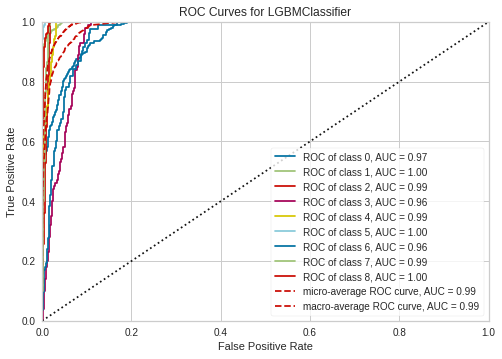

In [ ]:
#auc curve
plot_model(tuned_lgbm_clf, plot = 'auc')

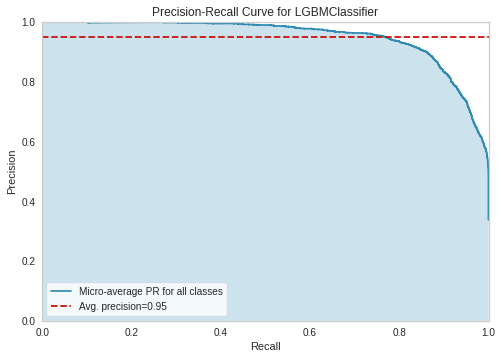

In [ ]:
#precision recall curve
plot_model(tuned_lgbm_clf, plot = 'pr')

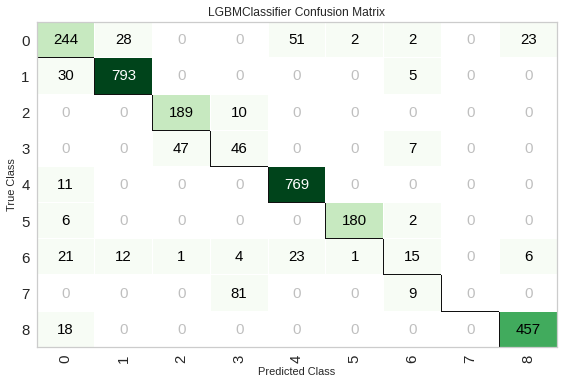

In [ ]:
#confusion matrix
plot_model(tuned_lgbm_clf, plot = 'confusion_matrix')

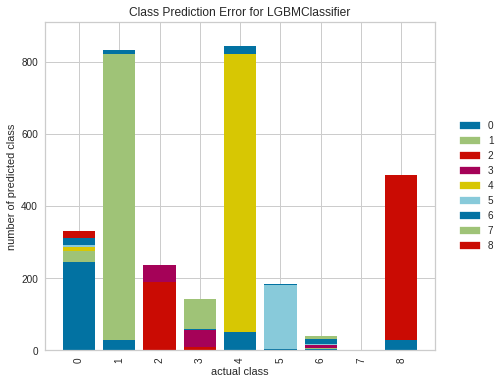

In [ ]:
#individual class error
plot_model(tuned_lgbm_clf, plot = 'error')

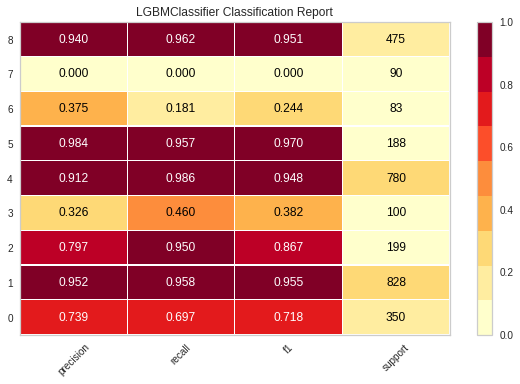

In [ ]:
#class report
plot_model(tuned_lgbm_clf, plot = 'class_report')

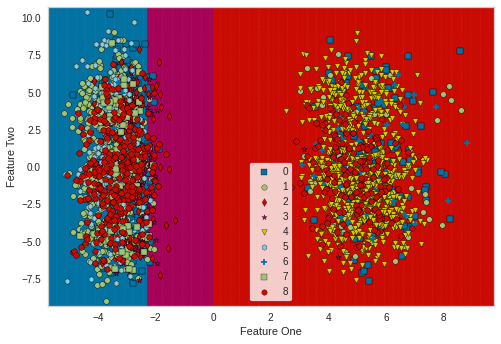

In [ ]:
plot_model(tuned_lgbm_clf, plot = 'boundary')

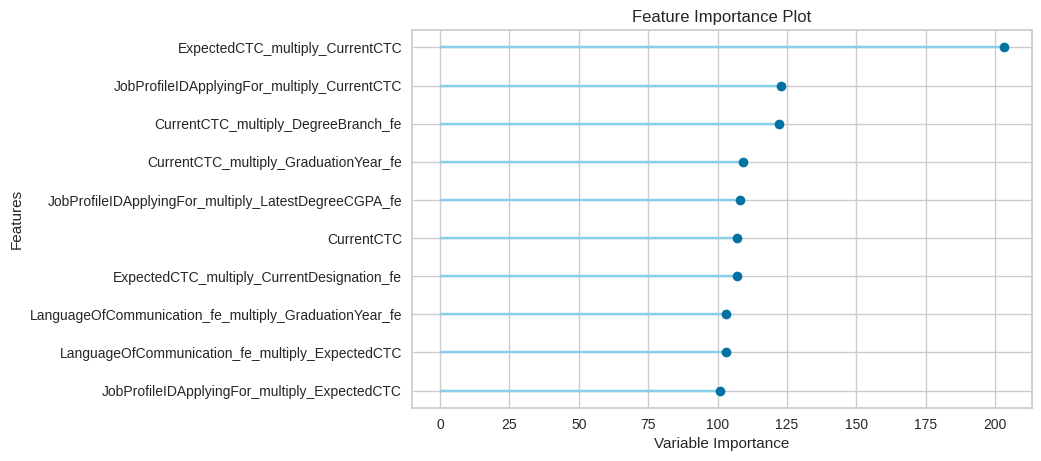

In [ ]:
#most important features
plot_model(tuned_lgbm_clf, plot = 'feature')

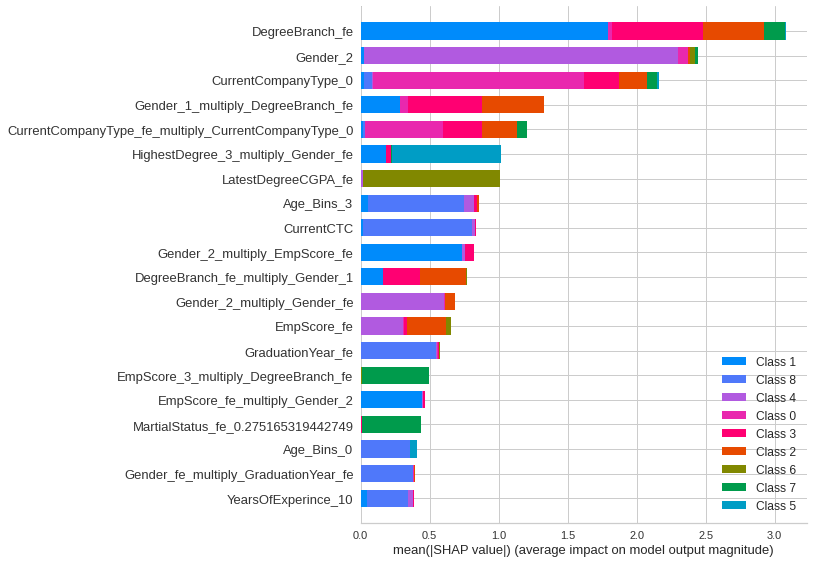

In [ ]:
#using shap interpret model
interpret_model(tuned_lgbm_clf)

In [ ]:
#plotting shap reason plot for the 5th(4) observation for dataframe.
interpret_model(tuned_lgbm_clf, plot = 'reason', observation = 4)

In [ ]:
#finalyzing  the model and predicting on the test set.
final_lgbm_clf = finalize_model(tuned_lgbm_clf)
test_predictions = predict_model(tuned_lgbm_clf, data=test)
save_model(final_lgbm_clf, 'final_lgbm_classifier')
test_predictions.rename(columns = {'Label':'BiasInfluentialFactor'}, inplace = True)
#storing the prediction into a submission file
final_submit = test_predictions.copy(deep=True)
final_submit = final_submit[['EmpID','BiasInfluentialFactor']]
print("---------------------")
print(final_submit.head())
final_submit.to_csv("final_submit_cb1.csv",index=False)

Transformation Pipeline and Model Succesfully Saved
---------------------
   EmpID BiasInfluentialFactor
0   5664          DegreeBranch
1  23568          DegreeBranch
2  21490         MartialStatus
3   8363    CurrentCompanyType
4   6165                Gender


In [ ]:
!cp /content/final_lgbm_classifier.pkl '/content/drive/MyDrive/Colab Weights'

###FitmentPercent - Regression and HyperOpt

**Second section of problem statement requires to predict `FitmentPercent`, while removing the Bias**

We would approach this via first training a model while considering all the parameters and predict on the test set.

In the second stage we would remove the respective Bias while traning again, and predict on the test set again. 

We would analyze the predictions for both of the stages.

Further we would be using model explainibility to see how each feature is effecting the prediction for both the stages and doin extensive analysis.

In [ ]:
#load the feature engineered dataset 
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Weights/train_fe_orig.csv")
dft = pd.read_csv("/content/drive/MyDrive/Colab Weights/test_fe_orig.csv")

This is HyperOpt section were we would use XGBoost to train our regression model using Stratified KFold and extensive set of paramters.

This process usually takes hours to find the optimal parameters, hence we would store the parameters after training for future use.

In [ ]:
#import required packages
import lightgbm as lgb
import xgboost as xgb
#import catboost as cb
import gc
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt.fmin import fmin
from hyperopt.pyll.stochastic import sample
#optional but advised
import warnings
warnings.filterwarnings('ignore')

#GLOBAL HYPEROPT PARAMETERS
NUM_EVALS = 1000 #number of hyperopt evaluation rounds
N_FOLDS = 5 #number of cross-validation folds on data in each evaluation round

#LIGHTGBM PARAMETERS
LGBM_MAX_LEAVES = 2**11 #maximum number of leaves per tree for LightGBM
LGBM_MAX_DEPTH = 25 #maximum tree depth for LightGBM
EVAL_METRIC_LGBM_REG = 'RMSE' #LightGBM regression metric. Note that 'rmse' is more commonly used 
EVAL_METRIC_LGBM_CLASS = 'auc'#LightGBM classification metric

#XGBOOST PARAMETERS
XGB_MAX_LEAVES = 2**12 #maximum number of leaves when using histogram splitting
XGB_MAX_DEPTH = 25 #maximum tree depth for XGBoost
EVAL_METRIC_XGB_REG = 'rmse' #XGBoost regression metric
EVAL_METRIC_XGB_CLASS = 'auc' #XGBoost classification metric

#CATBOOST PARAMETERS
CB_MAX_DEPTH = 8 #maximum tree depth in CatBoost
OBJECTIVE_CB_REG = 'RMSE' #CatBoost regression metric
OBJECTIVE_CB_CLASS = 'Logloss' #CatBoost classification metric

#OPTIONAL OUTPUT
BEST_SCORE = 0

def quick_hyperopt(data, labels, package='lgbm', num_evals=NUM_EVALS, diagnostic=False):
    
    #==========
    #LightGBM
    #==========
    
    if package=='lgbm':
        
        print('Running {} rounds of LightGBM parameter optimisation:'.format(num_evals))
        #clear space
        gc.collect()
        
        integer_params = ['max_depth',
                         'num_leaves',
                          'max_bin',
                         'min_data_in_leaf',
                         'min_data_in_bin']
        
        def objective(space_params):
            
            #cast integer params from float to int
            for param in integer_params:
                space_params[param] = int(space_params[param])
            
            #extract nested conditional parameters
            if space_params['boosting']['boosting'] == 'goss':
                top_rate = space_params['boosting'].get('top_rate')
                other_rate = space_params['boosting'].get('other_rate')
                #0 <= top_rate + other_rate <= 1
                top_rate = max(top_rate, 0)
                top_rate = min(top_rate, 0.5)
                other_rate = max(other_rate, 0)
                other_rate = min(other_rate, 0.5)
                space_params['top_rate'] = top_rate
                space_params['other_rate'] = other_rate
            
            subsample = space_params['boosting'].get('subsample', 1.0)
            space_params['boosting'] = space_params['boosting']['boosting']
            space_params['subsample'] = subsample
            
            #for classification, set stratified=True and metrics=EVAL_METRIC_LGBM_CLASS
            cv_results = lgb.cv(space_params, train, nfold = N_FOLDS, stratified=False,
                                early_stopping_rounds=100, metrics=EVAL_METRIC_LGBM_REG, seed=42)
            
            best_loss = cv_results['rmse-mean'][-1] #'l2-mean' for rmse
            #for classification, comment out the line above and uncomment the line below:
            #best_loss = 1 - cv_results['auc-mean'][-1]
            #if necessary, replace 'auc-mean' with '[your-preferred-metric]-mean'
            return{'loss':best_loss, 'status': STATUS_OK }
        
        train = lgb.Dataset(data, labels)
                
        #integer and string parameters, used with hp.choice()
        boosting_list = [{'boosting': 'gbdt',
                          'subsample': hp.uniform('subsample', 0.5, 1)},
                         {'boosting': 'goss',
                          'subsample': 1.0,
                         'top_rate': hp.uniform('top_rate', 0, 0.5),
                         'other_rate': hp.uniform('other_rate', 0, 0.5)}] #if including 'dart', make sure to set 'n_estimators'
        metric_list = ['MAE', 'RMSE'] 
        #for classification comment out the line above and uncomment the line below
        #metric_list = ['auc'] #modify as required for other classification metrics
        objective_list_reg = ['huber', 'gamma', 'fair', 'tweedie']
        objective_list_class = ['binary', 'cross_entropy']
        #for classification set objective_list = objective_list_class
        objective_list = objective_list_reg

        space ={'boosting' : hp.choice('boosting', boosting_list),
                'num_leaves' : hp.quniform('num_leaves', 2, LGBM_MAX_LEAVES, 1),
                'max_depth': hp.quniform('max_depth', 2, LGBM_MAX_DEPTH, 1),
                'max_bin': hp.quniform('max_bin', 32, 255, 1),
                'min_data_in_leaf': hp.quniform('min_data_in_leaf', 1, 256, 1),
                'min_data_in_bin': hp.quniform('min_data_in_bin', 1, 256, 1),
                'min_gain_to_split' : hp.quniform('min_gain_to_split', 0.1, 5, 0.01),
                'lambda_l1' : hp.uniform('lambda_l1', 0, 5),
                'lambda_l2' : hp.uniform('lambda_l2', 0, 5),
                'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
                'metric' : hp.choice('metric', metric_list),
                'objective' : hp.choice('objective', objective_list),
                'feature_fraction' : hp.quniform('feature_fraction', 0.5, 1, 0.01),
                'bagging_fraction' : hp.quniform('bagging_fraction', 0.5, 1, 0.01)
            }
        
        #optional: activate GPU for LightGBM
        #follow compilation steps here:
        #https://www.kaggle.com/vinhnguyen/gpu-acceleration-for-lightgbm/
        #then uncomment lines below:
        #space['device'] = 'gpu'
        #space['gpu_platform_id'] = 0,
        #space['gpu_device_id'] =  0

        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
                
        #fmin() will return the index of values chosen from the lists/arrays in 'space'
        #to obtain actual values, index values are used to subset the original lists/arrays
        best['boosting'] = boosting_list[best['boosting']]['boosting']#nested dict, index twice
        best['metric'] = metric_list[best['metric']]
        best['objective'] = objective_list[best['objective']]
                
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        if diagnostic:
            return(best, trials)
        else:
            return(best)
    
    #==========
    #XGBoost
    #==========
    
    if package=='xgb':
        
        print('Running {} rounds of XGBoost parameter optimisation:'.format(num_evals))
        #clear space
        gc.collect()
        
        integer_params = ['max_depth']
        
        def objective(space_params):
            
            for param in integer_params:
                space_params[param] = int(space_params[param])
                
            #extract multiple nested tree_method conditional parameters
            #libera te tutemet ex inferis
            if space_params['tree_method']['tree_method'] == 'hist':
                max_bin = space_params['tree_method'].get('max_bin')
                space_params['max_bin'] = int(max_bin)
                if space_params['tree_method']['grow_policy']['grow_policy']['grow_policy'] == 'depthwise':
                    grow_policy = space_params['tree_method'].get('grow_policy').get('grow_policy').get('grow_policy')
                    space_params['grow_policy'] = grow_policy
                    space_params['tree_method'] = 'hist'
                else:
                    max_leaves = space_params['tree_method']['grow_policy']['grow_policy'].get('max_leaves')
                    space_params['grow_policy'] = 'lossguide'
                    space_params['max_leaves'] = int(max_leaves)
                    space_params['tree_method'] = 'hist'
            else:
                space_params['tree_method'] = space_params['tree_method'].get('tree_method')
                
            #for classification replace EVAL_METRIC_XGB_REG with EVAL_METRIC_XGB_CLASS
            cv_results = xgb.cv(space_params, train, nfold=N_FOLDS, metrics=[EVAL_METRIC_XGB_REG],
                             early_stopping_rounds=100, stratified=False, seed=42)
            
            best_loss = cv_results['test-rmse-mean'].iloc[-1] #or 'test-rmse-mean' if using RMSE  test-mae-mean
            #for classification, comment out the line above and uncomment the line below:
            #best_loss = 1 - cv_results['test-auc-mean'].iloc[-1]
            #if necessary, replace 'test-auc-mean' with 'test-[your-preferred-metric]-mean'
            return{'loss':best_loss, 'status': STATUS_OK }
        
        train = xgb.DMatrix(data, labels)
        
        #integer and string parameters, used with hp.choice()
        boosting_list = ['gbtree'] #if including 'dart', make sure to set 'n_estimators', 'gblinear'
        metric_list = ['MAE', 'RMSE'] 
        #for classification comment out the line above and uncomment the line below
        #metric_list = ['auc']
        #modify as required for other classification metrics classification
        
        tree_method = [{'tree_method' : 'exact'},
               {'tree_method' : 'approx'},
               {'tree_method' : 'hist',
                'max_bin': hp.quniform('max_bin', 2**3, 2**7, 1),
                'grow_policy' : {'grow_policy': {'grow_policy':'depthwise'},
                                'grow_policy' : {'grow_policy':'lossguide',
                                                  'max_leaves': hp.quniform('max_leaves', 32, XGB_MAX_LEAVES, 1)}}}]
        
        #if using GPU, replace 'exact' with 'gpu_exact' and 'hist' with
        #'gpu_hist' in the nested dictionary above
        
        objective_list_reg = ['reg:squarederror', 'reg:gamma', 'reg:tweedie']
        objective_list_class = ['reg:logistic', 'binary:logistic']
        #for classification change line below to 'objective_list = objective_list_class'
        objective_list = objective_list_reg
        
        space ={'boosting' : hp.choice('boosting', boosting_list),
                'tree_method' : hp.choice('tree_method', tree_method),
                'max_depth': hp.quniform('max_depth', 2, XGB_MAX_DEPTH, 1),
                'reg_alpha' : hp.uniform('reg_alpha', 0, 5),
                'reg_lambda' : hp.uniform('reg_lambda', 0, 5),
                'min_child_weight' : hp.uniform('min_child_weight', 0, 5),
                'gamma' : hp.uniform('gamma', 0, 5),
                'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
                'eval_metric' : hp.choice('eval_metric', metric_list),
                'objective' : hp.choice('objective', objective_list),
                'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.01),
                'colsample_bynode' : hp.quniform('colsample_bynode', 0.1, 1, 0.01),
                'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.1, 1, 0.01),
                'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
                'nthread' : -1
            }
        
        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
        
        best['tree_method'] = tree_method[best['tree_method']]['tree_method']
        best['boosting'] = boosting_list[best['boosting']]
        best['eval_metric'] = metric_list[best['eval_metric']]
        best['objective'] = objective_list[best['objective']]
        
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        if 'max_leaves' in best:
            best['max_leaves'] = int(best['max_leaves'])
        if 'max_bin' in best:
            best['max_bin'] = int(best['max_bin'])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        
        if diagnostic:
            return(best, trials)
        else:
            return(best)
    
    #==========
    #CatBoost
    #==========
    
    if package=='cb':
        
        print('Running {} rounds of CatBoost parameter optimisation:'.format(num_evals))
        
        #clear memory 
        gc.collect()
            
        integer_params = ['depth',
                          #'one_hot_max_size', #for categorical data
                          'min_data_in_leaf',
                          'max_bin']
        
        def objective(space_params):
                        
            #cast integer params from float to int
            for param in integer_params:
                space_params[param] = int(space_params[param])
                
            #extract nested conditional parameters
            if space_params['bootstrap_type']['bootstrap_type'] == 'Bayesian':
                bagging_temp = space_params['bootstrap_type'].get('bagging_temperature')
                space_params['bagging_temperature'] = bagging_temp
                
            if space_params['grow_policy']['grow_policy'] == 'LossGuide':
                max_leaves = space_params['grow_policy'].get('max_leaves')
                space_params['max_leaves'] = int(max_leaves)
                
            space_params['bootstrap_type'] = space_params['bootstrap_type']['bootstrap_type']
            space_params['grow_policy'] = space_params['grow_policy']['grow_policy']
                           
            #random_strength cannot be < 0
            space_params['random_strength'] = max(space_params['random_strength'], 0)
            #fold_len_multiplier cannot be < 1
            space_params['fold_len_multiplier'] = max(space_params['fold_len_multiplier'], 1)
                       
            #for classification set stratified=True
            cv_results = cb.cv(train, space_params, fold_count=N_FOLDS, 
                             early_stopping_rounds=25, stratified=False, partition_random_seed=42)
           
            best_loss = cv_results['test-RMSE-mean'].iloc[-1] #'test-RMSE-mean' for RMSE  test-MAE-mean
            #for classification, comment out the line above and uncomment the line below:
            #best_loss = cv_results['test-Logloss-mean'].iloc[-1]
            #if necessary, replace 'test-Logloss-mean' with 'test-[your-preferred-metric]-mean'
            
            return{'loss':best_loss, 'status': STATUS_OK}
        
        train = cb.Pool(data, labels.astype('float32'))
        
        #integer and string parameters, used with hp.choice()
        bootstrap_type = [{'bootstrap_type':'Poisson'}, 
                           {'bootstrap_type':'Bayesian',
                            'bagging_temperature' : hp.loguniform('bagging_temperature', np.log(1), np.log(50))},
                          {'bootstrap_type':'Bernoulli'}] 
        LEB = ['No', 'AnyImprovement', 'Armijo'] #remove 'Armijo' if using CPU
        #score_function = ['Correlation', 'L2', 'NewtonCorrelation', 'NewtonL2']
        grow_policy = [{'grow_policy':'SymmetricTree'},
                       {'grow_policy':'Depthwise'},
                       {'grow_policy':'Lossguide',
                        'max_leaves': hp.quniform('max_leaves', 2, 32, 1)}]
        eval_metric_list_reg = ['MAE', 'RMSE', 'Poisson']
        eval_metric_list_class = ['Logloss', 'AUC', 'F1']
        #for classification change line below to 'eval_metric_list = eval_metric_list_class'
        eval_metric_list = eval_metric_list_reg
                
        space ={'depth': hp.quniform('depth', 2, CB_MAX_DEPTH, 1),
                'max_bin' : hp.quniform('max_bin', 1, 32, 1), #if using CPU just set this to 254
                'l2_leaf_reg' : hp.uniform('l2_leaf_reg', 0, 5),
                'min_data_in_leaf' : hp.quniform('min_data_in_leaf', 1, 50, 1),
                'random_strength' : hp.loguniform('random_strength', np.log(0.005), np.log(5)),
                #'one_hot_max_size' : hp.quniform('one_hot_max_size', 2, 16, 1), #uncomment if using categorical features
                'bootstrap_type' : hp.choice('bootstrap_type', bootstrap_type),
                'learning_rate' : hp.uniform('learning_rate', 0.05, 0.25),
                'eval_metric' : hp.choice('eval_metric', eval_metric_list),
                'objective' : OBJECTIVE_CB_REG,
                #'score_function' : hp.choice('score_function', score_function), #crashes kernel - reason unknown
                'leaf_estimation_backtracking' : hp.choice('leaf_estimation_backtracking', LEB),
                'grow_policy': hp.choice('grow_policy', grow_policy),
                #'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.1, 1, 0.01),# CPU only
                'fold_len_multiplier' : hp.loguniform('fold_len_multiplier', np.log(1.01), np.log(2.5)),
                'od_type' : 'Iter',
                'od_wait' : 25,
                'task_type' : 'GPU',
                'verbose' : 0
            }
        
        #optional: run CatBoost without GPU
        #uncomment line below
        #space['task_type'] = 'CPU'
            
        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
        
        #unpack nested dicts first
        best['bootstrap_type'] = bootstrap_type[best['bootstrap_type']]['bootstrap_type']
        best['grow_policy'] = grow_policy[best['grow_policy']]['grow_policy']
        best['eval_metric'] = eval_metric_list[best['eval_metric']]
        
        #best['score_function'] = score_function[best['score_function']] 
        #best['leaf_estimation_method'] = LEM[best['leaf_estimation_method']] #CPU only
        best['leaf_estimation_backtracking'] = LEB[best['leaf_estimation_backtracking']]        
        
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        if 'max_leaves' in best:
            best['max_leaves'] = int(best['max_leaves'])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        
        if diagnostic:
            return(best, trials)
        else:
            return(best)
    
    else:
        print('Package not recognised. Please use "lgbm" for LightGBM, "xgb" for XGBoost or "cb" for CatBoost.')  

In [ ]:
#dropping unnecessary columns
X = df.drop(labels = ["EmpID","JobProfileIDApplyingFor","BiasInfluentialFactor","FitmentPercent"], axis=1)
y = df["FitmentPercent"]

In [ ]:
#XGboost HyperOpt for 1000 steps
xgb_params = quick_hyperopt(X, y, 'xgb', 1000)

Running 100 rounds of XGBoost parameter optimisation:
100%|██████████| 100/100 [01:02<00:00,  1.60it/s, best loss: 11.806154]
{boosting: gbtree
colsample_bylevel: 0.5700000000000001
colsample_bynode: 0.68
colsample_bytree: 0.7000000000000001
eval_metric: MAE
gamma: 0.8976150535049399
learning_rate: 0.19577389906628848
max_depth: 19
min_child_weight: 3.122075324614233
objective: reg:squarederror
reg_alpha: 2.435239534253974
reg_lambda: 3.7988337869657403
subsample: 0.9
tree_method: exact}


In [ ]:
#training the whole dataset of the parameters we obtained after HyperOpt
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Weights/train_fe_orig.csv")
dft = pd.read_csv("/content/drive/MyDrive/Colab Weights/test_fe_orig.csv")

X = df.drop(labels = ["EmpID","JobProfileIDApplyingFor","BiasInfluentialFactor","FitmentPercent"], axis=1)
y = df["FitmentPercent"]

import xgboost as xgb
xgb_old = xgb.XGBRegressor(
    colsample_bylevel= 0.23,
    colsample_bynode= 0.81,
    colsample_bytree= 0.9500000000000001,
    gamma= 4.160087676928187,
    learning_rate= 0.19998185420469883,
    max_depth= 24,
    min_child_weight= 1.5508835423897405,
    objective= 'reg:squarederror',
    reg_alpha= 4.200014072158408,
    reg_lambda= 0.008329686196903108,
    subsample= 0.7000000000000001,
    tree_method= 'approx',
)
xgb_old.fit(X,y)
preds = xgb_old.predict(dft.drop(labels=["EmpID","JobProfileIDApplyingFor","BiasInfluentialFactor"], axis=1))

In [ ]:
#predicting on the test set and storing the test set to google drive for future use
dftx = dft.copy(deep=True)
dftx['FitmentPrediction'] = preds
dftx.to_csv("test_wpredict.csv", index=False)
!cp '/content/test_wpredict.csv' '/content/drive/MyDrive/Colab Weights'

In [ ]:
#merging the predictions into the submit file
final_submit['FitmentPercent'] = dftx['FitmentPrediction']
print("---------------------")
print(final_submit.head())

In [ ]:
explainer_biased = shap.TreeExplainer(xgb_old)
shap_dfo = dft.drop(labels = ['EmpID','JobProfileIDApplyingFor','BiasInfluentialFactor',], axis = 1)
shap_valueso = explainer_biased.shap_values(shap_dfo)

In [ ]:
#force - plot
print('Base Value:', explainer_biased.expected_value)
shap.initjs()
shap.force_plot(explainer_biased.expected_value, shap_valueso[0,:], shap_dfo.iloc[0,:])

Base Value: 81.84108


In [ ]:
#force - plot for 100 rows
shap.initjs()
shap.force_plot(explainer_biased.expected_value, shap_valueso[:100,:], shap_dfo.iloc[:100,:])

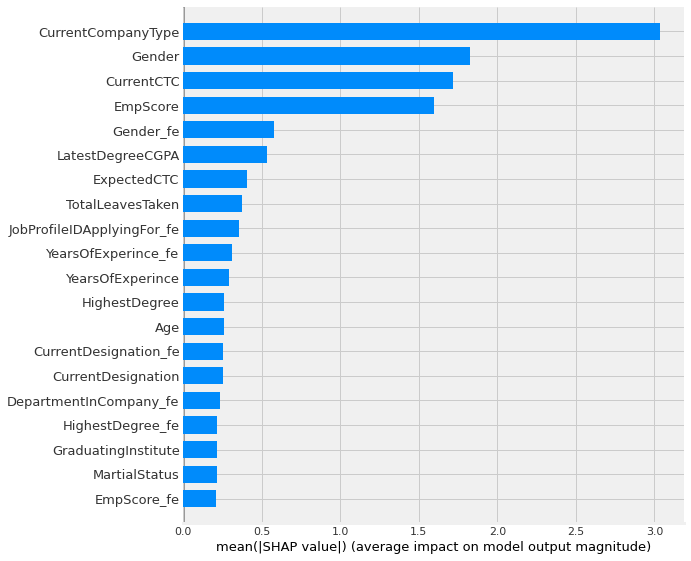

In [ ]:
#feature importance
shap.initjs()
shap.summary_plot(shap_valueso, shap_dfo.iloc[:100,:], plot_type="bar")

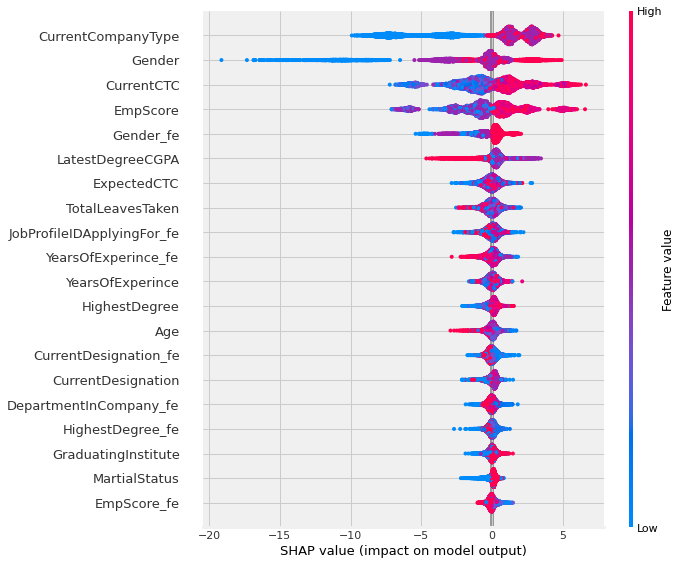

In [ ]:
#summary plot
shap.initjs()
shap.summary_plot(shap_valueso, shap_dfo.iloc[:,:])

In [ ]:
shap.dependence_plot(ind='Age', interaction_index='Age',
                     shap_values=shap_valueso[:100], 
                     features=X.iloc[:100,:],  
                     display_features=X)

####ExplainerDashboard

In [ ]:
import xgboost as xgb
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, RegressionExplainer
from sklearn.model_selection import train_test_split
X = df.drop(labels = ["EmpID","JobProfileIDApplyingFor","BiasInfluentialFactor","FitmentPercent"], axis=1)
y = df["FitmentPercent"]

X_train, X_test,y_train, y_test = train_test_split(X, y, train_size=0.75)
model = xgb.XGBRegressor(
    boosting= 'gblinear',
    colsample_bylevel= 0.23,
    colsample_bynode= 0.81,
    colsample_bytree= 0.9500000000000001,
    gamma= 4.160087676928187,
    learning_rate= 0.19998185420469883,
    max_depth= 24,
    min_child_weight= 1.5508835423897405,
    objective= 'reg:squarederror',
    reg_alpha= 4.200014072158408,
    reg_lambda= 0.008329686196903108,
    subsample= 0.7000000000000001,
    tree_method= 'approx',
)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', boosting='gblinear',
             colsample_bylevel=0.23, colsample_bynode=0.81,
             colsample_bytree=0.9500000000000001, gamma=4.160087676928187,
             importance_type='gain', learning_rate=0.19998185420469883,
             max_delta_step=0, max_depth=24,
             min_child_weight=1.5508835423897405, missing=None,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0,
             reg_alpha=4.200014072158408, reg_lambda=0.008329686196903108,
             scale_pos_weight=1, seed=None, silent=None,
             subsample=0.7000000000000001, tree_method='approx', verbosity=1)

In [ ]:
explainer = RegressionExplainer(model, X_test, y_test, target = "FitmentPercent",  units = "%" )

Changing class type to XGBRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [ ]:
ExplainerDashboard(explainer, mode='external', shap_interaction=False).run()

Building ExplainerDashboard..
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Generating xgboost model dump...
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.2:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

###Bias Removal

**Third stage of the problem statement is one of the most unique and intriguing problem statement. We have to remove the particular bias present in the data and make predictions from it.**

This method involves taking train, predicted test and the bias to remove data. The procedure is to filter the data, remove bias related features from the dataset for the indiviual columns and making predictons.

Once that is done, we use SHAP to visualize various aspects of our predictions and draw inference from it.

In [ ]:
#read train and test dataset, with test dataset containing predictions from overall model built above
import pandas as pd
df_new  = pd.read_csv("/content/drive/MyDrive/Colab Weights/train_fe_orig.csv")
dft_new  = pd.read_csv("/content/drive/MyDrive/Colab Weights/test_wpredict.csv")

In [ ]:
#the fucntion defined below will be used to calculate the RMSE error between the old predictiona and new predictions
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

**The function defined below performs the following operation to get the "UN-BIASED" prediction**

1. It takes 3 input -- train, predicted test and the BIAS category.
2. Filters train and test data, with rows that have the same mentioned BIAS.
3. It removes the columns associated with the BIAS. For ex. if the mentioned bias is "Gender", it would remove "Gender" and "Gender_fe" from the dataset.
4. It will next remove unnecessary columns and split dataset into features and labels.
5. It will fit the XGBoost regressor to the following dataset and store the UNBIASED predictions into test data.
6. It will show outputs such as, Previous Predictions, Unbiased Predictions and RMSE between them
7. The function will return the filtered train, test and the xgboost model.


In [ ]:
def with_vs_without_bias(train,test,to_remove):
  #get dataframe
  ndf = train[train['BiasInfluentialFactor'] == to_remove]
  ndft = test[test['BiasInfluentialFactor'] == to_remove]
  print("Train and Test Size - ",ndf.shape, ndft.shape)

  #removal
  if to_remove == 'DegreeBranch':
    ndft_add = ndft[to_remove]
    ndf.drop(labels=['DegreeBranch','DegreeBranch_fe'],axis=1,inplace=True)
    ndft.drop(labels=['DegreeBranch','DegreeBranch_fe'],axis=1,inplace=True)

  if to_remove == 'CurrentCompanyType':
    ndft_add = ndft[to_remove]
    ndf.drop(labels=['CurrentCompanyType','CurrentCompanyType_fe'],axis=1,inplace=True)
    ndft.drop(labels=['CurrentCompanyType','CurrentCompanyType_fe'],axis=1,inplace=True)

  if to_remove == 'EmpScore':
    ndft_add = ndft[to_remove]
    ndf.drop(labels=['EmpScore','EmpScore_fe'],axis=1,inplace=True)
    ndft.drop(labels=['EmpScore','EmpScore_fe'],axis=1,inplace=True)
  
  if to_remove == 'YearsOfExperince':
    ndft_add = ndft[to_remove]
    ndf.drop(labels=['YearsOfExperince','YearsOfExperince_fe'],axis=1,inplace=True)
    ndft.drop(labels=['YearsOfExperince','YearsOfExperince_fe'],axis=1,inplace=True)
  
  if to_remove == 'Gender':
    ndft_add = ndft[to_remove]
    ndf.drop(labels=['Gender','Gender_fe'],axis=1,inplace=True)
    ndft.drop(labels=['Gender','Gender_fe'],axis=1,inplace=True)
  
  if to_remove == 'MartialStatus':
    ndft_add = ndft[to_remove]
    ndf.drop(labels=['MartialStatus','MartialStatus_fe'],axis=1,inplace=True)
    ndft.drop(labels=['MartialStatus','MartialStatus_fe'],axis=1,inplace=True)

  if to_remove == 'HighestDegree':
    ndft_add = ndft[to_remove]
    ndf.drop(labels=['HighestDegree','HighestDegree_fe'],axis=1,inplace=True)
    ndft.drop(labels=['HighestDegree','HighestDegree_fe'],axis=1,inplace=True)

  if to_remove == 'Ethinicity':
    ndft_add = ndft[to_remove]
    ndf.drop(labels=['LanguageOfCommunication','LanguageOfCommunication_fe'],axis=1,inplace=True)
    ndft.drop(labels=['LanguageOfCommunication','LanguageOfCommunication_fe'],axis=1,inplace=True)

  if to_remove == 'LatestDegreeCGPA':
    ndft_add = ndft[to_remove]
    ndf.drop(labels=['LatestDegreeCGPA','LatestDegreeCGPA_fe'],axis=1,inplace=True)
    ndft.drop(labels=['LatestDegreeCGPA','LatestDegreeCGPA_fe'],axis=1,inplace=True)

  print("Train and Test Size after feature removal - ",ndf.shape, ndft.shape) 

  #data and labels
  data = ndf.drop(labels = ['EmpID','JobProfileIDApplyingFor','BiasInfluentialFactor','FitmentPercent'], axis = 1)
  labels = np.array([float(fp) for fp in ndf['FitmentPercent']])

  #training
  xgc = xgb.XGBRegressor(
      colsample_bylevel = 0.67,
      colsample_bynode = 0.86,
      colsample_bytree = 1.0,
      gamma = 2.63156535465054,
      learning_rate = 0.19516059180816273,
      max_bin = 18,
      max_depth = 17,
      max_leaves = 259,
      min_child_weight = 4.965457904534935,
      objective =  'reg:squarederror' ,
      reg_alpha = 4.0278665562848515,
      reg_lambda = 0.11018537445319598,
      subsample = 0.8500000000000001,
      tree_method =  'hist')
  
  xgc.fit(data, labels)

  predictions = xgc.predict(ndft.drop(labels=["EmpID","JobProfileIDApplyingFor","BiasInfluentialFactor","FitmentPrediction"], axis=1))
  ndft['FitmentPrediction_without_Bias'] = predictions

  predictions = xgc.predict(ndf.drop(labels=["EmpID","JobProfileIDApplyingFor","BiasInfluentialFactor","FitmentPercent"], axis=1))
  ndf['FitmentPrediction_without_Bias'] = predictions

  print("RMSE Error before and after removal of features")
  print(rmse(ndft['FitmentPrediction_without_Bias'],ndft['FitmentPrediction']))
  print("-----------------------------------------------")

  print("Fitment % before and after removing Bias")
  print(ndft[['FitmentPrediction','FitmentPrediction_without_Bias',]].head())
  print("-----------------------------------------------")

  ndft[to_remove] = ndft_add

  print(ndft[ndft['BiasInfluentialFactor']==to_remove].groupby([to_remove]).agg({'FitmentPrediction_without_Bias': ['mean','max','min','std']}))       
  print("-----------------------------------------------")
  print(test[test['BiasInfluentialFactor']==to_remove].groupby([to_remove]).agg({'FitmentPrediction': ['mean','max','min','std']}))    

  #shap
  explainer_unbiased = shap.TreeExplainer(xgc)
  shap_dfn = ndft.drop(labels = ['EmpID','JobProfileIDApplyingFor','BiasInfluentialFactor',
                                'FitmentPrediction','FitmentPrediction_without_Bias',
                                to_remove], axis = 1)   

  return ndf , ndft, xgc, explainer_unbiased, shap_dfn

In [ ]:
ndtx, ndftx, xgb_new, explainer_unbiased, shap_dfn = with_vs_without_bias(train = df_new, test= dft_new, to_remove='Gender')

Train and Test Size -  (2605, 39) (1920, 39)
Train and Test Size after feature removal -  (2605, 37) (1920, 37)
RMSE Error before and after removal of features
4.368365921953914
-----------------------------------------------
Fitment % before and after removing Bias
    FitmentPrediction  FitmentPrediction_without_Bias
4            80.05063                       78.131126
14           86.12673                       83.255302
21           82.27699                       83.214096
25           80.86676                       81.907570
30           79.11372                       81.377945
-----------------------------------------------
       FitmentPrediction_without_Bias                                
                                 mean        max        min       std
Gender                                                               
2                           82.014091  92.607704  73.368469  3.164899
-----------------------------------------------
       FitmentPrediction         

Let's see different SHAP graphs of unbiased model and draw inference from them.

In [ ]:
#loading the shap explainer
shap_valuesn = explainer_unbiased.shap_values(shap_dfn)

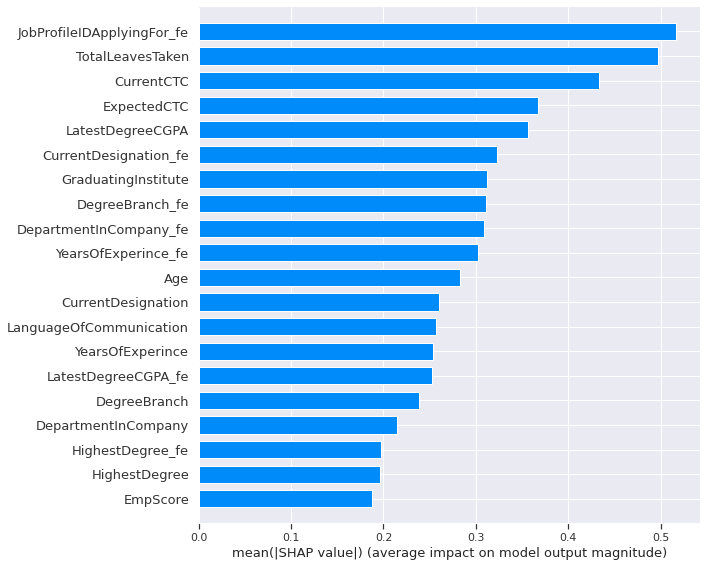

In [ ]:
#feature importance
shap.initjs()
shap.summary_plot(shap_valuesn, shap_dfn, plot_type="bar")

In [ ]:
#the values on which below predictions are made
shap_dfn.iloc[0,:]

LanguageOfCommunication          2.000000
Age                             36.000000
HighestDegree                    1.000000
DegreeBranch                     1.000000
GraduatingInstitute              2.000000
LatestDegreeCGPA                 7.000000
YearsOfExperince                 6.000000
GraduationYear                2015.000000
CurrentCTC                      22.000000
ExpectedCTC                     32.000000
MartialStatus                    1.000000
EmpScore                         4.000000
CurrentDesignation               3.000000
CurrentCompanyType               1.000000
DepartmentInCompany              2.000000
TotalLeavesTaken                 9.000000
Age_Bins                         3.000000
TotalLeavesTaken_Bins            1.000000
CurrentCTC_Bins                  2.000000
ExpectedCTC_Bins                 3.000000
LanguageOfCommunication_fe       0.350688
JobProfileIDApplyingFor_fe       0.344967
HighestDegree_fe                 0.048021
DegreeBranch_fe                  0

In [ ]:
#this showcases the individual predictions. 
#Features in red pushes the fitment percent forward while features in blue pushes it backward  
print('Base Value:', explainer_unbiased.expected_value)
shap.initjs()
shap.force_plot(explainer_unbiased.expected_value, shap_valuesn[0,:], shap_dfn.iloc[0,:])

Base Value: 82.063126


**Inference**

CurrentCTC, Expected CTC and EmpScore puches the model to higher fitment percent  while factors such as Department in Company(0 - Customer Success) and Age are pushing it downward.

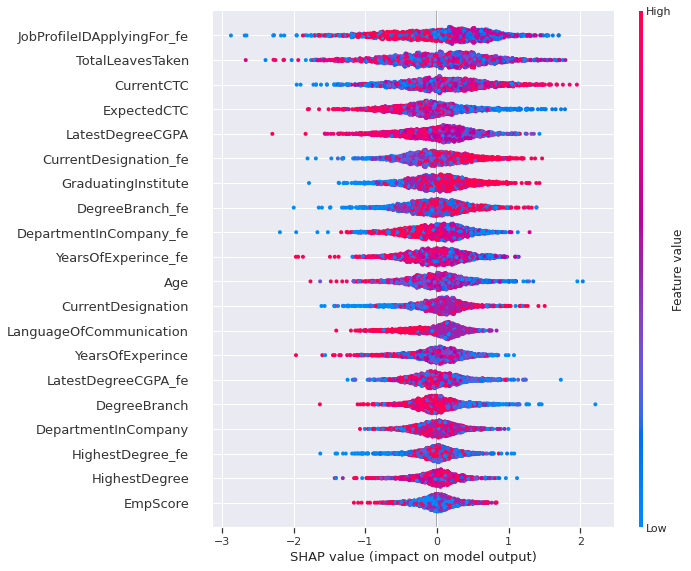

In [ ]:
#summary graph
shap.initjs()
shap.summary_plot(shap_valuesn, shap_dfn.iloc[:,:])

In [ ]:
#forceplot of 100 individual predictions
shap.initjs()
shap.force_plot(explainer_unbiased.expected_value, shap_valuesn[:100,:], shap_dfn.iloc[:100,:])

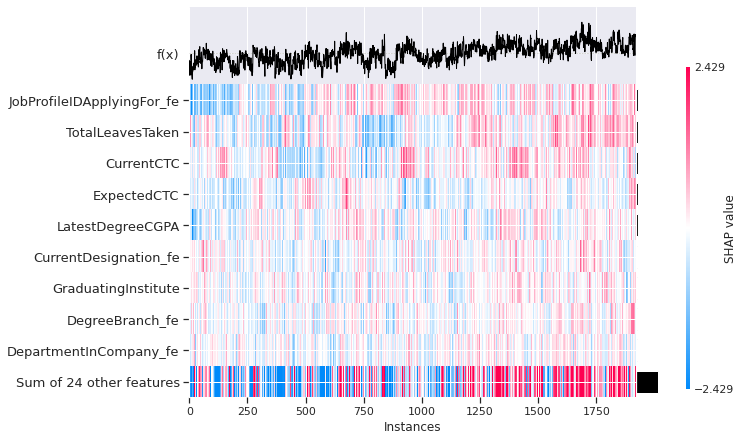

In [ ]:
explainerx = shap.Explainer(xgb_new)
shap_valuesnn = explainerx(shap_dfn)
shap.plots.heatmap(shap_valuesnn)

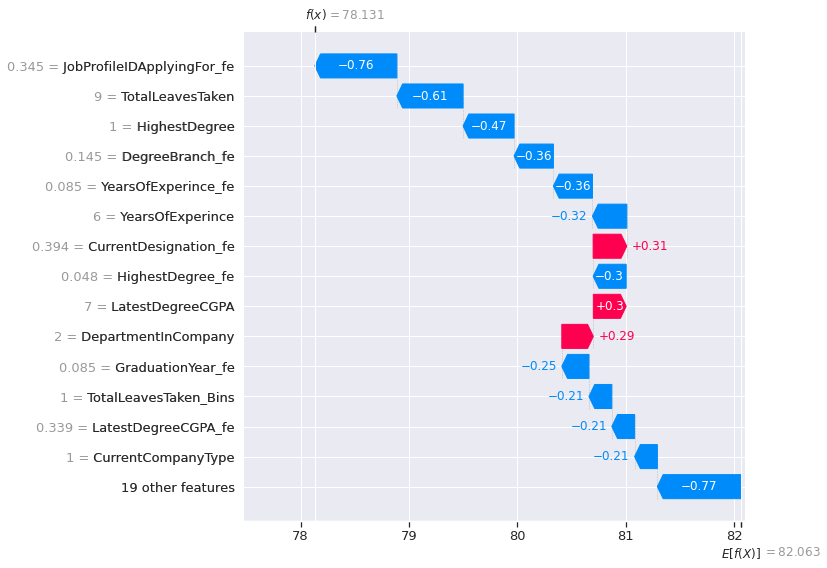

In [ ]:
shap.plots.waterfall(shap_valuesnn[0],max_display=15) # For the first observation

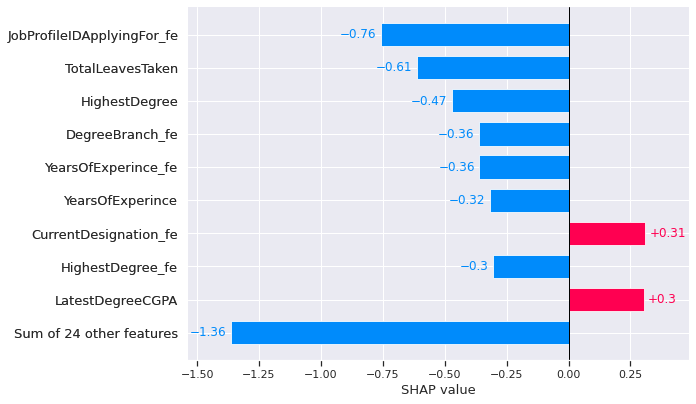

In [ ]:
shap.plots.bar(shap_valuesnn[0]) # For the first observation

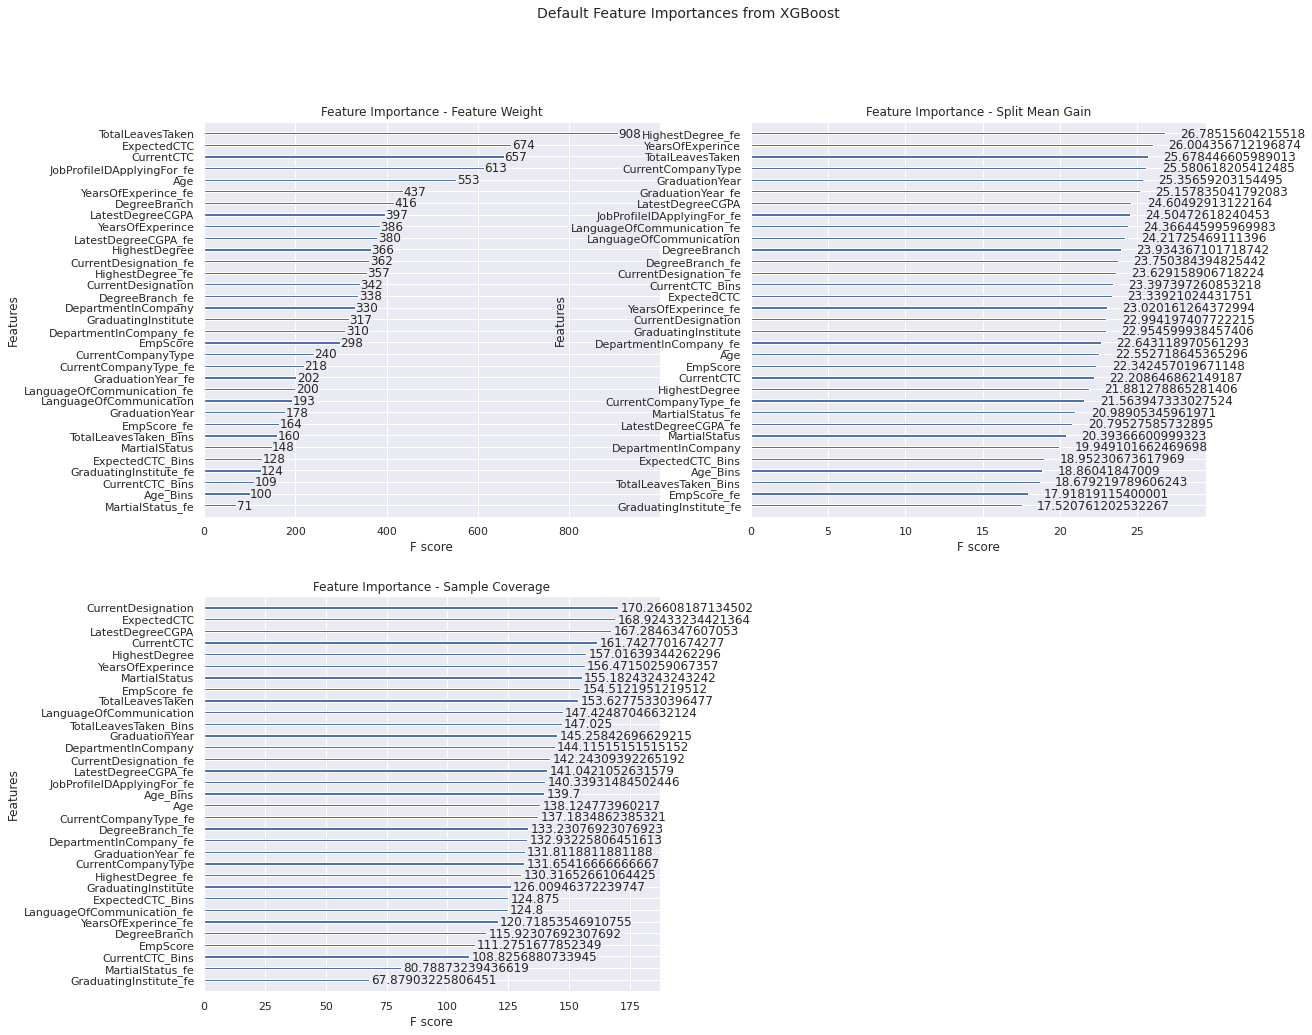

In [ ]:
fig = plt.figure(figsize = (16,16))
title = fig.suptitle("Default Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2,1)
xgb.plot_importance(xgb_new, importance_type='weight', ax=ax1)
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2,2)
xgb.plot_importance(xgb_new, importance_type='gain', ax=ax2)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2,3)
xgb.plot_importance(xgb_new, importance_type='cover', ax=ax3)
t=ax3.set_title("Feature Importance - Sample Coverage")

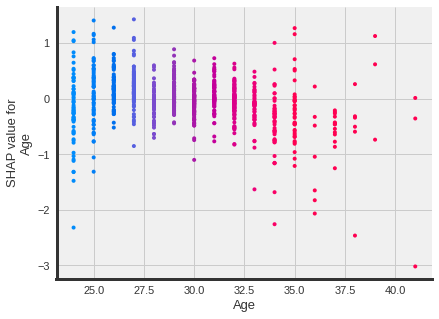

In [ ]:
shap.dependence_plot(ind='Age', interaction_index='Age',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

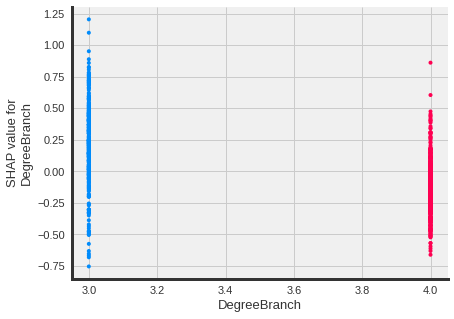

In [ ]:
shap.dependence_plot(ind='DegreeBranch', interaction_index='DegreeBranch',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

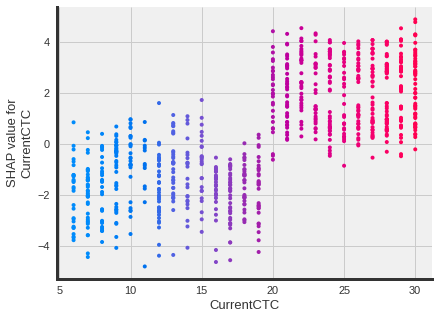

In [ ]:
shap.dependence_plot(ind='CurrentCTC', interaction_index='CurrentCTC',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

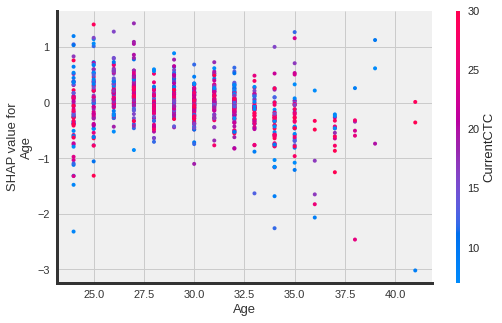

In [ ]:
shap.dependence_plot(ind='Age', interaction_index='CurrentCTC', 
                     shap_values=shap_values, features=X_test, 
                     display_features=X_test)